# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044

## Tabla de contenidos
- [Importación y configuración](#imports-y-configs)
- [Análisis Exploratorio y Preprocesamiento de Datos](#análisis-exploratorio-y-preprocesamiento-de-datos)
     - [Exploración inicial](#exploracion-inicial)
          - [Primera aproximación a los datos](#primera-aproximación-a-los-datos)
          - [Variables cualitativas](#variables-cualitativas)
          - [Variables cuantitativas](#variables-cuantitativas)
          - [Variales irrelevantes para el análisis](#variales-irrelevantes-para-el-análisis)
          - [Análisis gráfico distribución de variables](#análisis-gráfico-distribución-de-variables)
          - [Correlaciones entre variables](#correlaciones-entre-variables)
          - [Relación de variables con el target](#relación-de-variables-con-el-target)
     - [Visualización de datos](#visualización-de-datos)
     - [Datos faltantes](#datos-faltantes)
          - [Análisis](#análisis)
          - [Revisión y decisión](#revisión-y-decisión)
          - [Comparaciones](#comparaciones)
     - [Data Cleaning](#data-cleaning)
          - [Tipos de datos](#tipos-de-datos)
          - [Ingeniería de features](#ingeniería-de-features)
     - [Valores atípicos](#valores-atípicos)
          - [Análisis Univariado](#análisis-univariado)
          - [Análisis Multivariado](#análisis-multivariado)


#### Imports y configs

Importamos las librerias y creamos el dataframe

In [323]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor



In [324]:
df = pd.read_csv('./Datasets/hotels_train.csv')
df.drop(columns=['reservation_status_date'], inplace=True)

hotel = df.copy()


## Análisis Exploratorio y Preprocesamiento de Datos

### **Exploración inicial**

#### Primera aproximación a los datos

Primero vemos cómo están organizados los datos, imprimiendo algunas filas:

In [325]:
hotel.sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
37929,City Hotel,14,2016,July,27,1,0,1,2,0.0,...,No Deposit,14.0,NaN,0,Transient,149.00,0,3,22cc0874-f33c-4190-955d-04aa02495a53,0
27508,City Hotel,393,2017,April,16,22,2,1,2,0.0,...,Non Refund,229.0,NaN,0,Transient,90.00,0,0,a68311dc-a3ec-4966-af1e-bc6ce1c7977d,1
53422,Resort Hotel,121,2016,May,21,19,2,5,2,0.0,...,No Deposit,243.0,NaN,0,Contract,48.18,0,0,7a006c7e-464f-457b-aad4-d0b4f422083d,0
33402,City Hotel,53,2016,June,26,20,1,3,2,0.0,...,No Deposit,9.0,NaN,0,Transient,99.90,0,2,6c03a6b1-d67c-45b7-b432-289c38fd684c,0
55072,Resort Hotel,210,2017,August,33,19,2,5,2,0.0,...,No Deposit,261.0,NaN,0,Transient,135.90,1,0,b0d69f77-e210-4760-9b7b-a2c24e8aa5a4,0


Vemos que el dataset contiene información sobre las reservas en dos hoteles distintos.

In [326]:
hotel.hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Luego vemos el tipo de dato de cada columna y determinamos a qué tipo de variable corresponde, así sabemos el análisis que se le puede efectuar.

In [327]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Vemos que hay un mix de variables, cualitativas, ordinales y cuantitativas (discretas y continuas). Se observa que están representadas por varios tipos de datos. Por ejemplo algunas que son de tipo numérico, son cualitativas, como por ejemplo 'agent' y 'company'. El número seguramente representa un índice o id. Otras columnas son "booleanas", el valor numérico representa "verdadero" o "falso". Normalmente un 1 en dicha columna será verdadero, y un 0, falso. Estas columnas son 'is_repeated_guest' e 'is_canceled'.

Vemos si hay duplicados en el dataset:

In [328]:
print(f'Cantidad de filas duplicadas: {hotel.duplicated().sum()}')

Cantidad de filas duplicadas: 0


In [329]:
hotel.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


#### Variables cualitativas

Para las variables cualitativas se pueden determinar los valores posibles, y a qué corresponden.

In [330]:
cualitativas = hotel[['hotel','arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'is_canceled', 'agent', 'company']]
cualitativas

,hotel,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,is_canceled,agent,company
0,City Hotel,37,BB,USA,Online TA,TA/TO,0,D,D,No Deposit,9.0,NaN,Transient,1,9.0,NaN
1,Resort Hotel,44,BB,PRT,Groups,Direct,0,A,A,No Deposit,NaN,NaN,Transient,0,NaN,NaN
2,City Hotel,42,BB,CHE,Online TA,TA/TO,0,F,F,No Deposit,9.0,NaN,Transient,0,9.0,NaN
3,City Hotel,51,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,154.0,NaN,Transient,1,154.0,NaN
4,City Hotel,12,BB,FRA,Offline TA/TO,TA/TO,0,A,A,No Deposit,20.0,NaN,Transient-Party,0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,4,BB,ESP,Online TA,TA/TO,0,A,D,No Deposit,240.0,NaN,Transient,1,240.0,NaN
61909,City Hotel,36,SC,FRA,Online TA,TA/TO,0,A,A,No Deposit,NaN,NaN,Transient,0,NaN,NaN
61910,City Hotel,19,BB,FRA,Aviation,Corporate,0,A,A,No Deposit,NaN,153.0,Transient,0,NaN,153.0
61911,Resort Hotel,41,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,96.0,NaN,Transient,1,96.0,NaN


La variable 'hotel' puede tomar los siguientes valores:

In [331]:
hotel['hotel'].value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

La variable 'arrival_date_month' puede tomar los siguientes valores:

In [332]:
hotel['arrival_date_month'].value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

La variable 'arrival_date_week_number' puede tomar los siguientes valores:

In [333]:
hotel['arrival_date_week_number'].value_counts().sort_index()

1      552
2      642
3      668
4      733
5      655
6      735
7     1073
8     1170
9     1082
10    1085
11    1028
12     995
13    1257
14    1189
15    1385
16    1250
17    1547
18    1611
19    1196
20    1464
21    1467
22    1370
23    1362
24    1354
25    1412
26    1232
27    1359
28    1490
29    1424
30    1609
31    1397
32    1600
33    1876
34    1533
35    1305
36    1166
37    1166
38    1456
39    1368
40    1271
41    1449
42    1449
43    1224
44    1170
45    1037
46     837
47     788
48     721
49     915
50     781
51     464
52     575
53     969
Name: arrival_date_week_number, dtype: int64

La variable 'meal' puede tomar los siguientes valores:

In [334]:
hotel['meal'].value_counts().sort_index()

BB           47837
FB             477
HB            7452
SC            5556
Undefined      591
Name: meal, dtype: int64

La variable 'country' puede tomar los siguientes valores:

In [335]:
hotel['country'].value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

La variable 'market_segment' puede tomar los siguientes valores:

In [336]:
hotel['market_segment'].value_counts()


Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

La variable 'distribution_channel' puede tomar los siguientes valores:

In [337]:
hotel['distribution_channel'].value_counts()


TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

La variable 'is_repeated_guest' puede tomar los siguientes valores:

In [338]:
hotel['is_repeated_guest'].value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

La variable 'reserved_room_type' puede tomar los siguientes valores:

In [339]:
hotel['reserved_room_type'].value_counts().sort_index()

A    45134
B      580
C      482
D     9585
E     3249
F     1451
G     1090
H      334
L        1
P        7
Name: reserved_room_type, dtype: int64

La variable 'assigned_room_type' puede tomar los siguientes valors:

In [340]:
hotel['assigned_room_type'].value_counts().sort_index()


A    40007
B     1056
C     1127
D    12190
E     3779
F     1821
G     1277
H      384
I      145
K      119
L        1
P        7
Name: assigned_room_type, dtype: int64

La variable 'deposit_type' puede tomar los siguientes valores:

In [341]:
hotel['deposit_type'].value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

La variable 'agent' puede tomar los siguientes valores:

In [342]:
hotel['agent'].value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

La variable 'company' puede tomar los siguientes valores:

In [343]:
hotel['company'].value_counts()


40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
305.0      1
275.0      1
461.0      1
220.0      1
160.0      1
Name: company, Length: 276, dtype: int64

La variable 'customer_type' puede tomar los siguientes valores:

In [344]:
hotel['customer_type'].value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

La variable 'is_canceled' puede tomar los siguientes valores:

In [345]:
hotel['is_canceled'].value_counts()


0    30972
1    30941
Name: is_canceled, dtype: int64

#### Variables cuantitativas

Para las variables cuantitativas se pueden calcular las medidas de resumen, "estadísticas", como media, mediana y moda.

In [346]:
cuantitativas = hotel[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cuantitativas.describe()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


#### Variables irrelevantes para el análisis

Si bien la variable ``'id'`` no provee ninguna información del contexto y no será analizada ni usada en el entrenamiento del modelo, es necesaria para identificar cada columan a la hora de determinar la precision del modelo. Por esto no la vamos a eliminar del dataset.

Además de esta, es difícil determinar qué variable será irrelevante, antes de haberlas analizado y visto cómo se relacionan entre ellas y con el target 'is_canceled'.

#### Análisis gráfico distribuciones de las variables

Analizamos la distribución de todas las variables, tanto cualitativas como cuantitativas.

##### *Variables cualitativas*

Primero analizamos la distribucion de las variables cualitativas:

<Axes: xlabel='hotel', ylabel='count'>

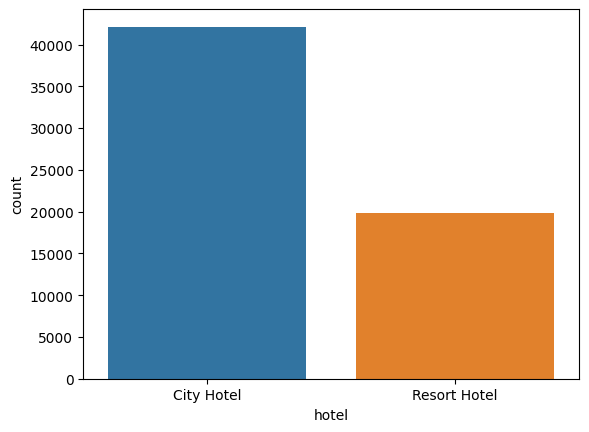

In [347]:
sns.countplot(x='hotel', data=cualitativas)

<Axes: xlabel='customer_type', ylabel='count'>

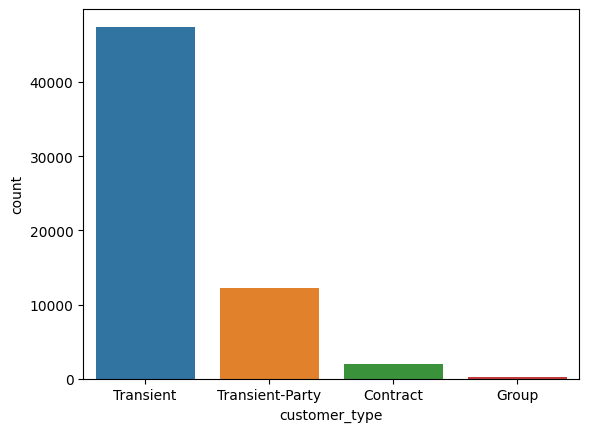

In [348]:
sns.countplot(x='customer_type', data=cualitativas)

<Axes: xlabel='deposit_type', ylabel='count'>

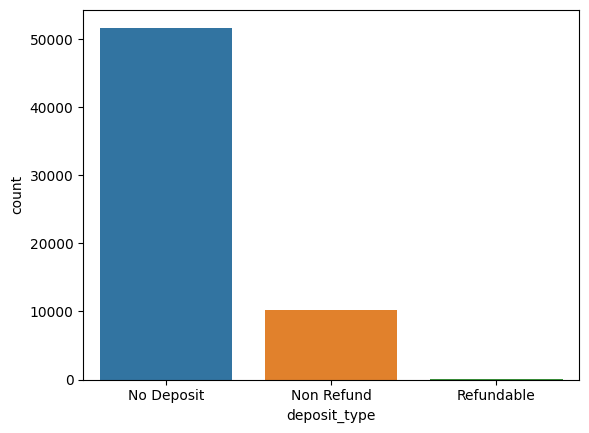

In [349]:
sns.countplot(x='deposit_type', data=cualitativas)

<Axes: xlabel='distribution_channel', ylabel='count'>

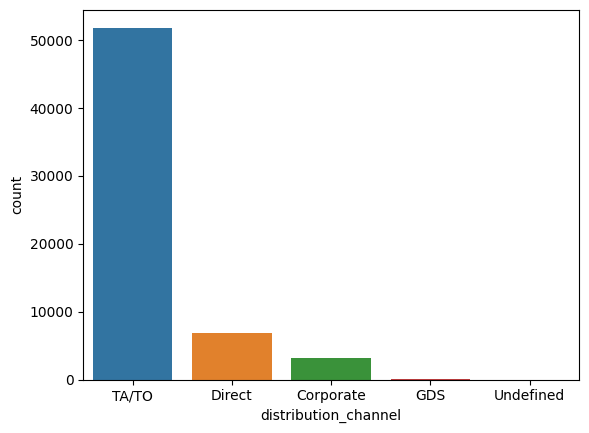

In [350]:
sns.countplot(x='distribution_channel', data=cualitativas)

[Text(0, 0, 'Online TA'),
 Text(1, 0, 'Groups'),
 Text(2, 0, 'Offline TA/TO'),
 Text(3, 0, 'Direct'),
 Text(4, 0, 'Complementary'),
 Text(5, 0, 'Corporate'),
 Text(6, 0, 'Aviation'),
 Text(7, 0, 'Undefined')]

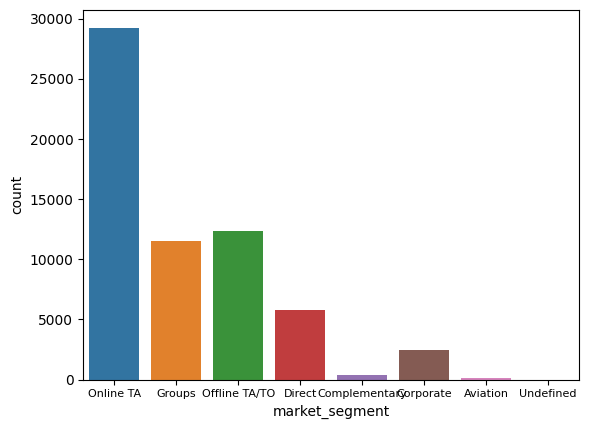

In [351]:
sns.countplot(x='market_segment', data=cualitativas)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

<Axes: xlabel='count', ylabel='country'>

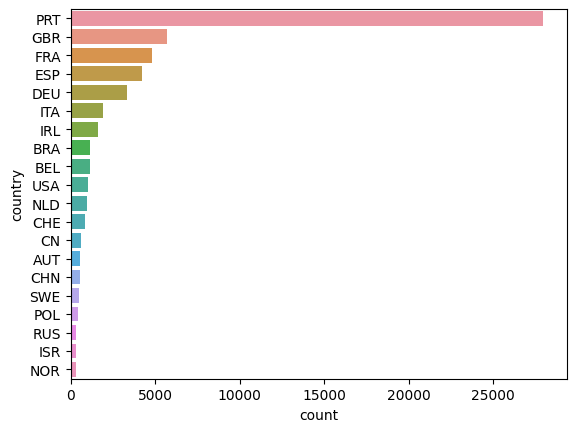

In [352]:
sns.countplot(y='country', data=cualitativas, order=cualitativas['country'].value_counts().iloc[:20].index)

<Axes: xlabel='value', ylabel='Count'>

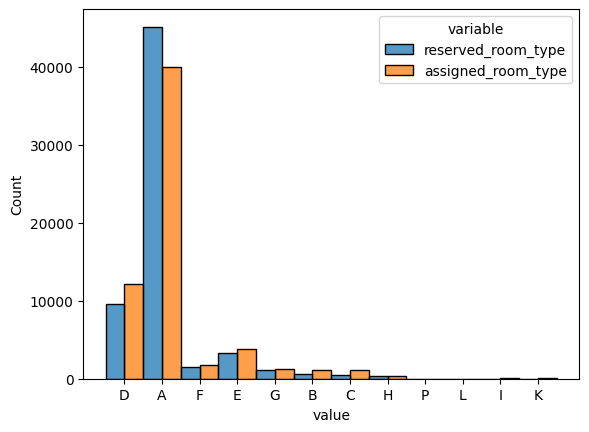

In [353]:
room_types = hotel[['assigned_room_type', 'reserved_room_type']].copy()

room_types_melted = pd.melt(room_types, value_vars=[
                    'reserved_room_type', 'assigned_room_type'])

sns.histplot(data=room_types_melted, x='value',
             hue='variable', binwidth=1, multiple='dodge')

<Axes: xlabel='is_repeated_guest', ylabel='count'>

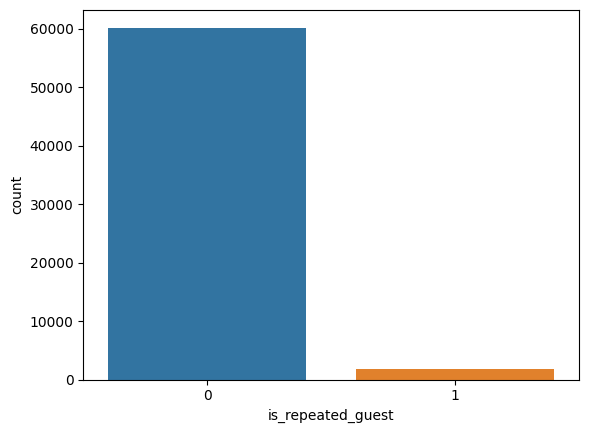

In [354]:
sns.countplot(x='is_repeated_guest', data=cualitativas)

<Axes: xlabel='meal', ylabel='count'>

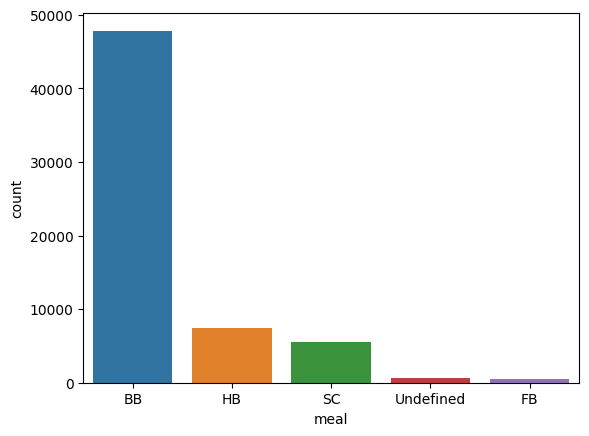

In [355]:
sns.countplot(x='meal', data=cualitativas)

<Axes: xlabel='is_canceled', ylabel='count'>

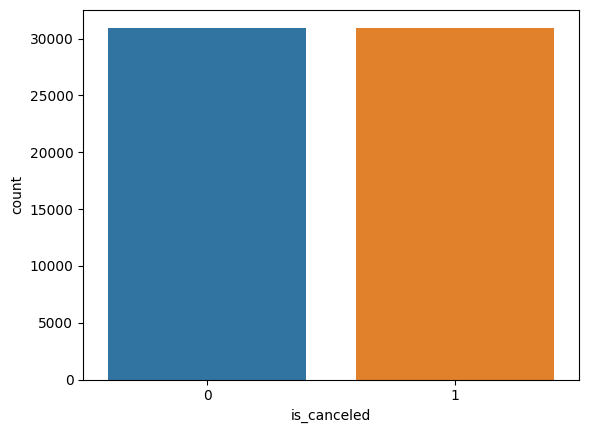

In [356]:
sns.countplot(x='is_canceled', data=cualitativas)

##### *Variables cuantitativas*

Ahora vemos la distribucion de las variables cuantitativas

<Axes: xlabel='lead_time', ylabel='Count'>

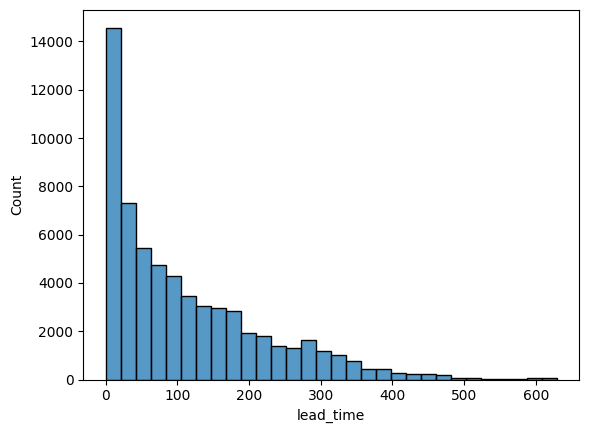

In [357]:
sns.histplot(hotel['lead_time'], bins=30)

<Axes: xlabel='arrival_date_year', ylabel='count'>

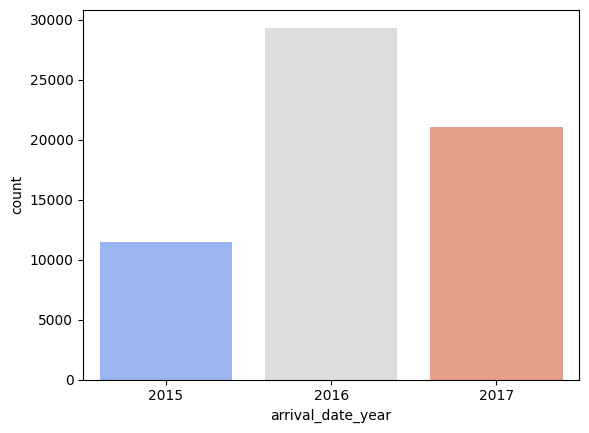

In [358]:
sns.countplot(x='arrival_date_year', data = cuantitativas, palette='coolwarm')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31')]

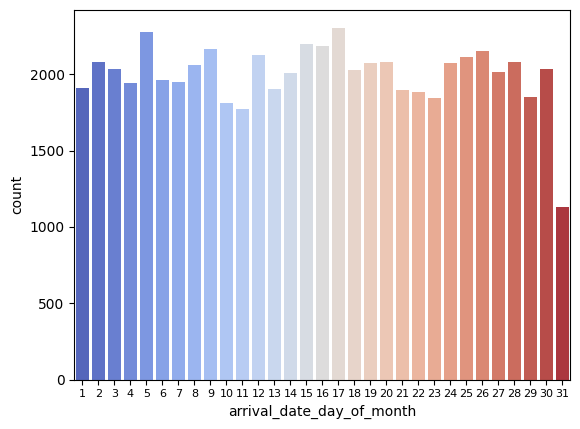

In [359]:
sns.countplot(x='arrival_date_day_of_month', data = cuantitativas, palette='coolwarm')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

<Axes: xlabel='stays_in_weekend_nights', ylabel='count'>

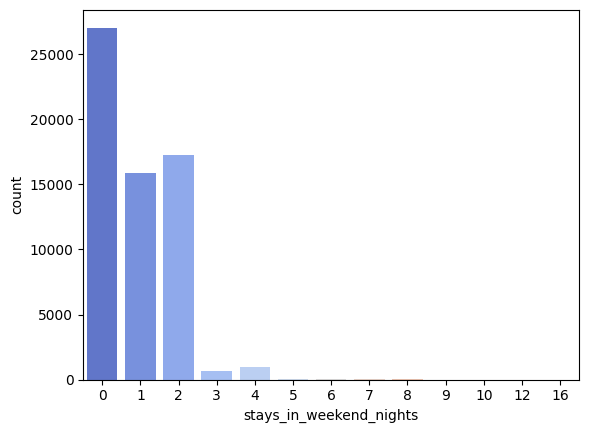

In [360]:
sns.countplot(x='stays_in_weekend_nights', data = cuantitativas, palette='coolwarm')

<Axes: xlabel='stays_in_week_nights', ylabel='count'>

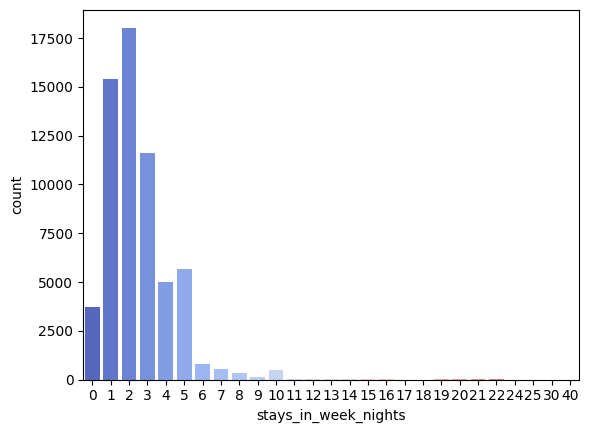

In [361]:
sns.countplot(x='stays_in_week_nights', data = cuantitativas, palette='coolwarm')

<Axes: xlabel='adults', ylabel='count'>

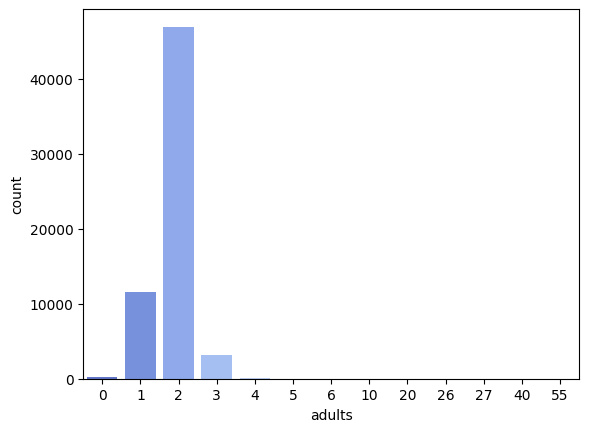

In [362]:
sns.countplot(x='adults', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='children', ylabel='count'>

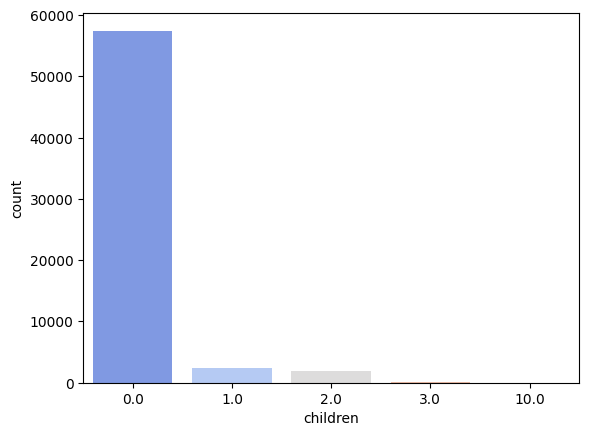

In [363]:
sns.countplot(x='children', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='babies', ylabel='count'>

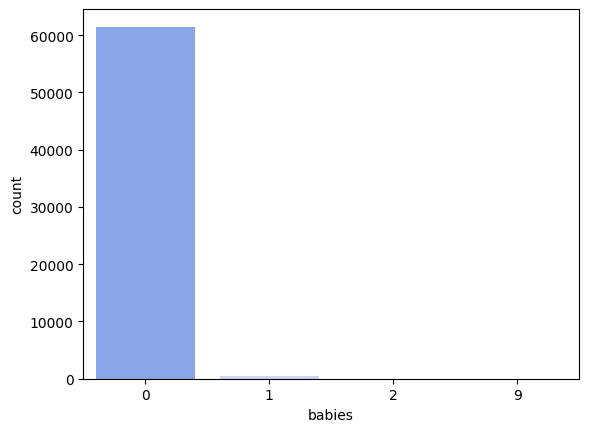

In [364]:
sns.countplot(x='babies', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='previous_cancellations', ylabel='count'>

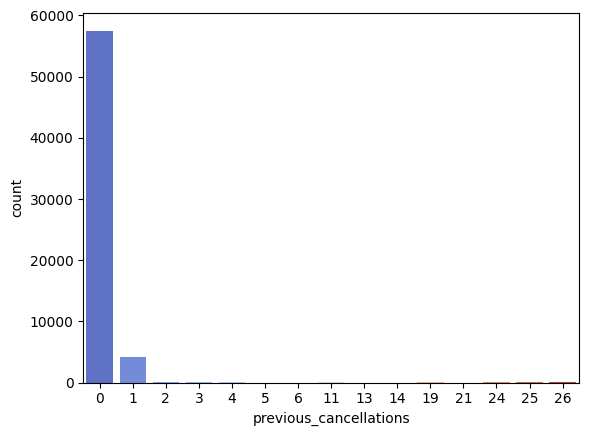

In [365]:
sns.countplot(x='previous_cancellations', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='previous_bookings_not_canceled', ylabel='Count'>

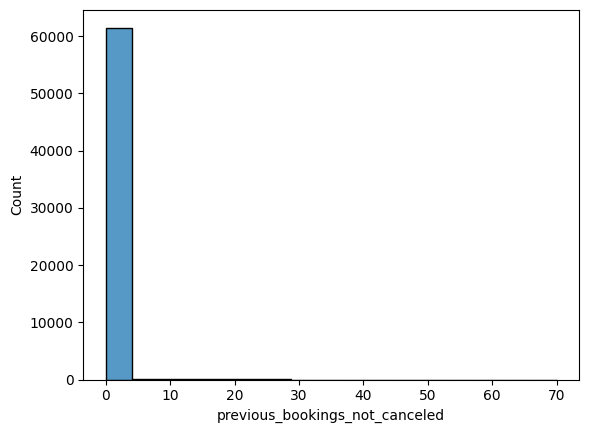

In [366]:
sns.histplot(x='previous_bookings_not_canceled', data=cuantitativas)

<Axes: xlabel='booking_changes', ylabel='count'>

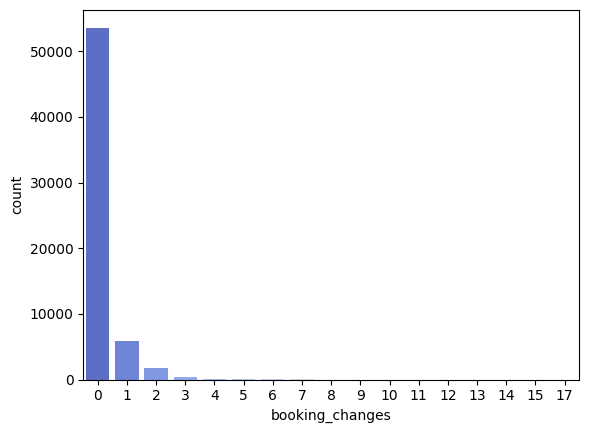

In [367]:
sns.countplot(x='booking_changes', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='days_in_waiting_list', ylabel='Count'>

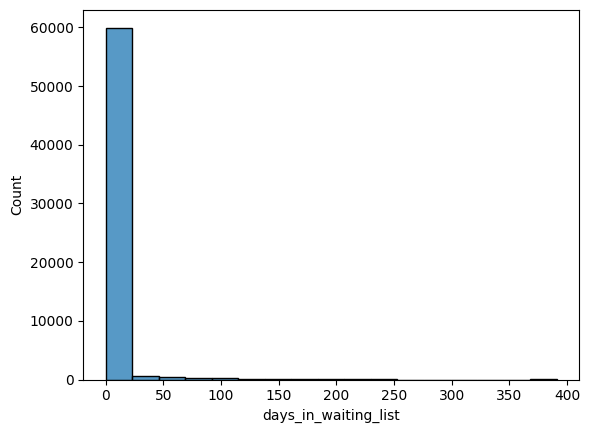

In [368]:
sns.histplot(x='days_in_waiting_list', data=cuantitativas)

<Axes: xlabel='adr', ylabel='Count'>

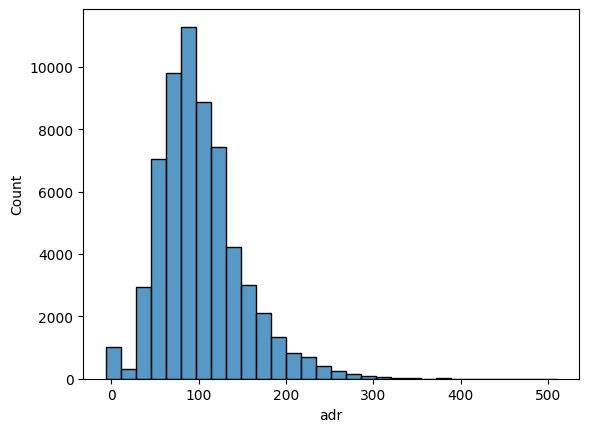

In [369]:
sns.histplot(x='adr', data=cuantitativas, bins=30)

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

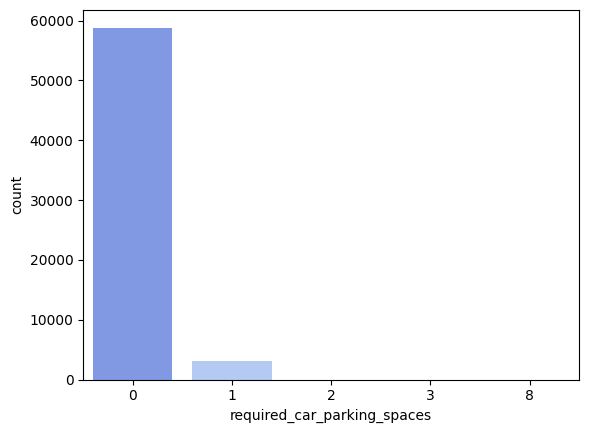

In [370]:
sns.countplot(x='required_car_parking_spaces', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='total_of_special_requests', ylabel='count'>

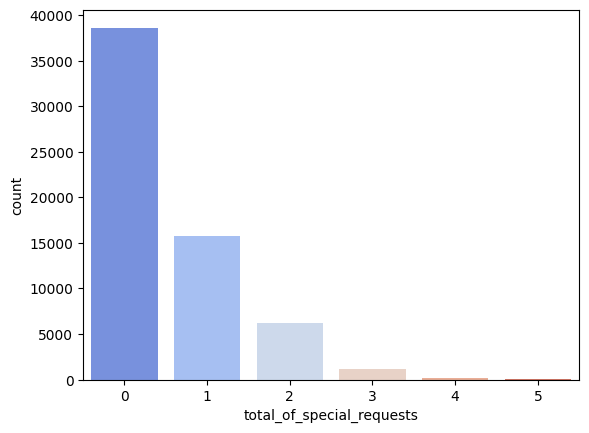

In [371]:
sns.countplot(x='total_of_special_requests', data=cuantitativas, palette = 'coolwarm')

#### Correlaciones entre variables

Calculamos la matriz de correlaciones para ver las correlaciones entre las variables del dataset.

In [372]:
matriz_corr = hotel.corr()
matriz_corr

C:\Users\Luca\AppData\Local\Temp\ipykernel_34484\3331105379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = hotel.corr()


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


Podemos graficar las correlaciones en un heatmap para que sea mas simple de ver

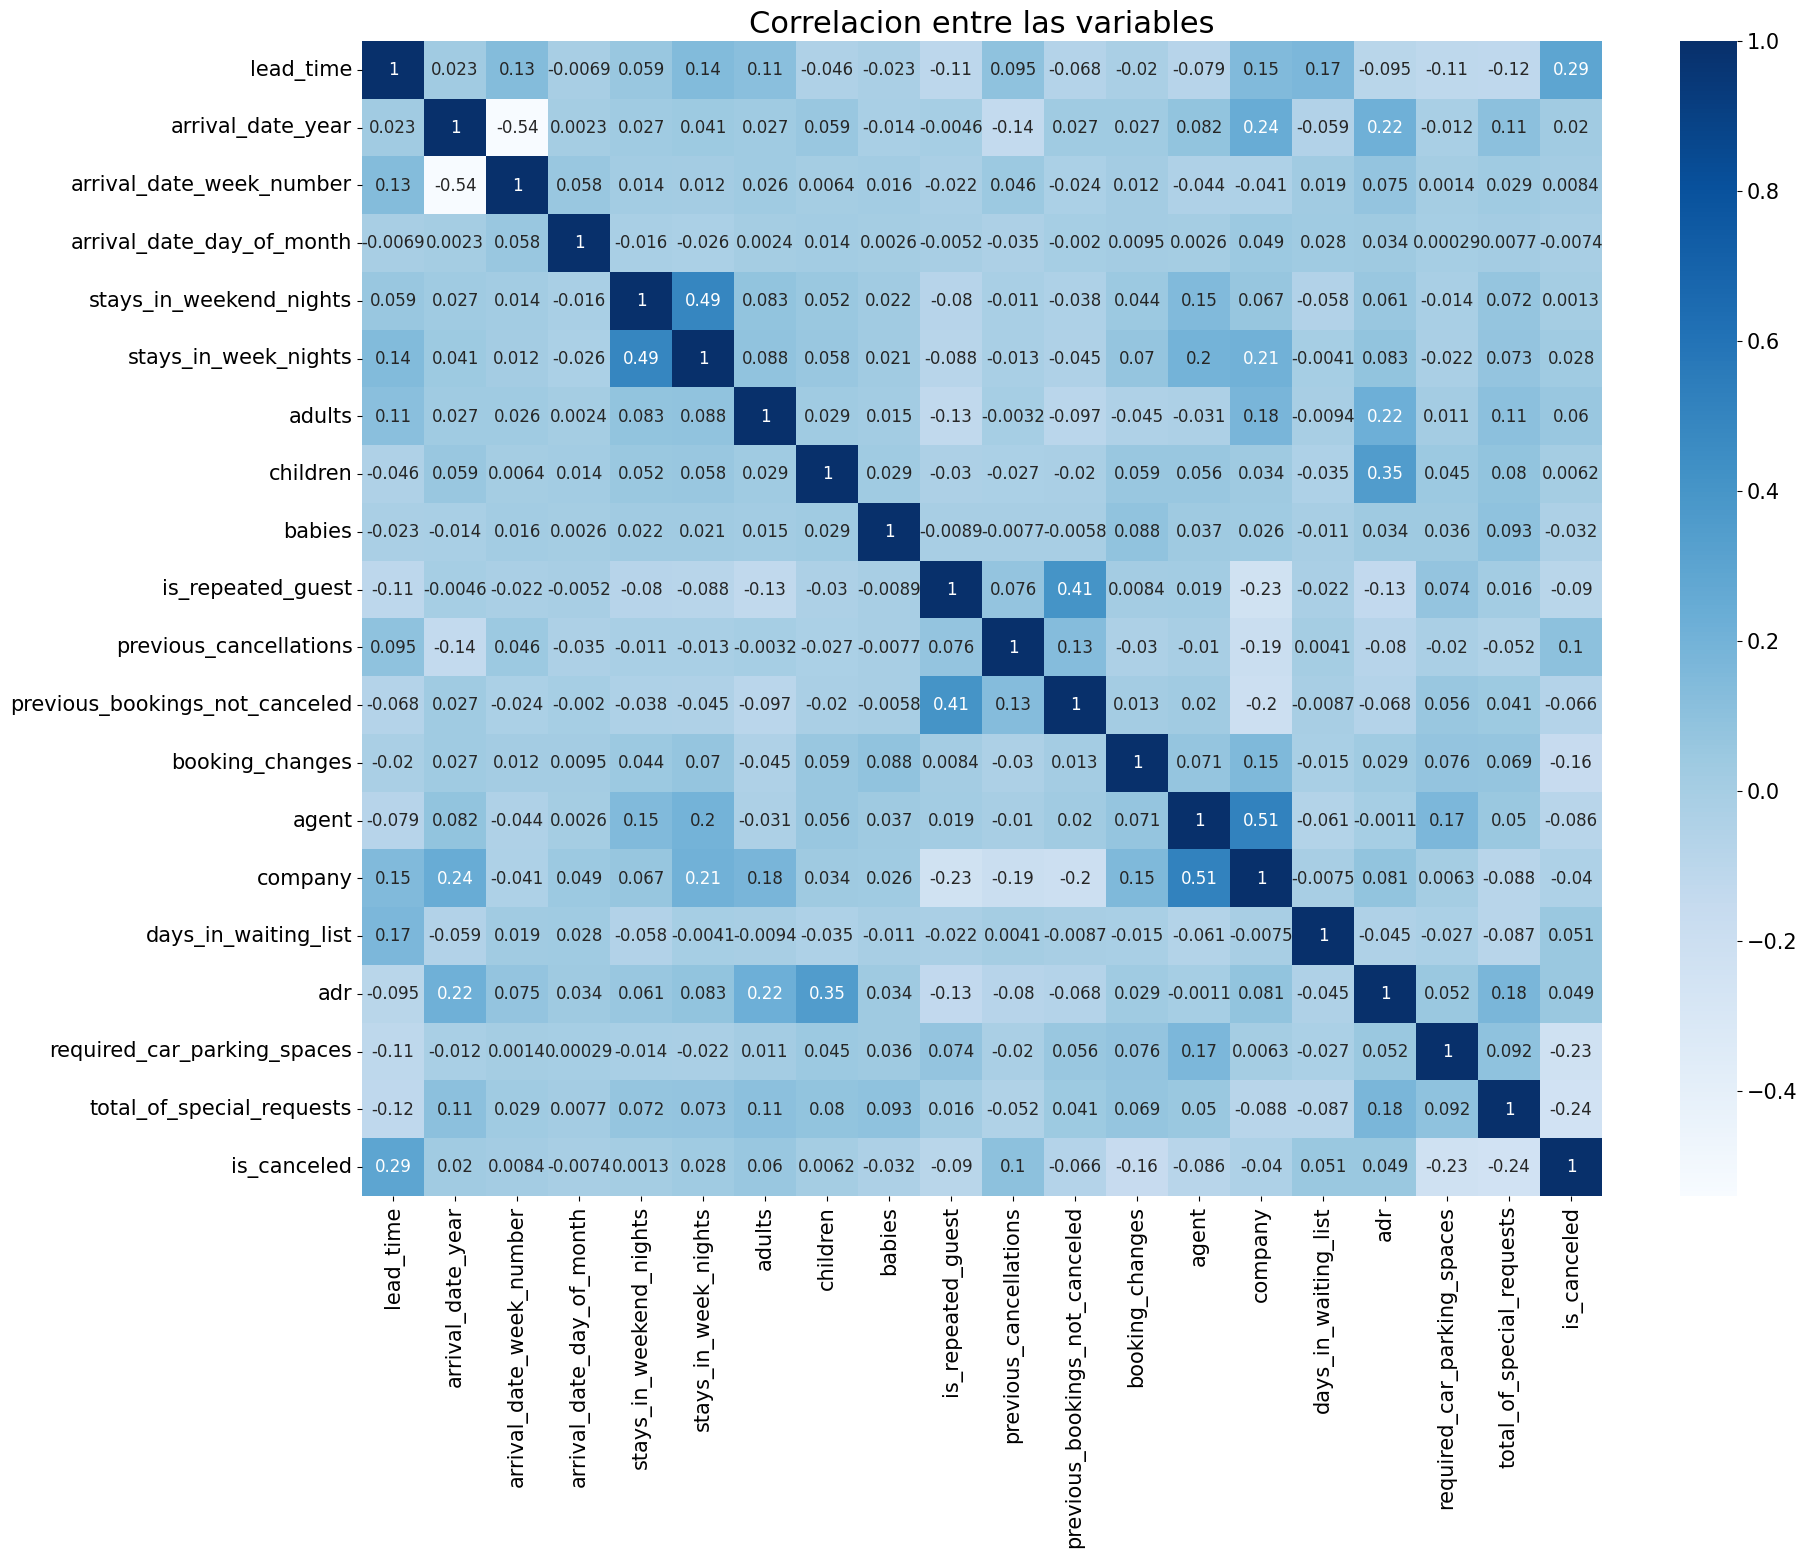

In [373]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(data = matriz_corr, annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlacion entre las variables', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

No hay variables que tengan una correlacion demasiado alta, es decir, muy cercana a 1. Esto es bueno, ya que no hay variables que esten muy correlacionadas entre si.
Igualmente veremos mas de cerca aquellas variables que tengan un poco de correlacion. 

Las correlaciones con el target 'is_canceled' se analizan más adelante.

Vamos a considerar las correlaciones mayores a 0.3:
- `'stays_in_weekend_nights'` y `'stays_in_week_nights'`
- `'previous_bookings_not_canceled'` y `'is_repeated_guest'`
- `'children'` y `'adr'`

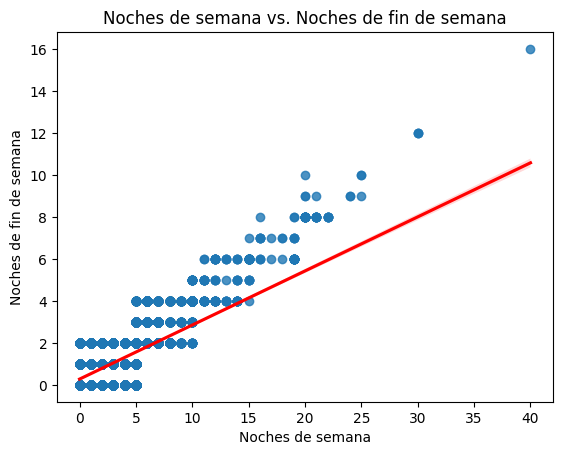

In [374]:
sns.regplot(x=hotel['stays_in_week_nights'], y=hotel['stays_in_weekend_nights'], line_kws={'color':'red'}).set(xlabel='Noches de semana', ylabel='Noches de fin de semana', title='Noches de semana vs. Noches de fin de semana')
plt.show()

Vemos que poseen una correlacion positiva como también habíamos visto en la matriz de correlaciones. Esto se explica por el simple hecho de que a mayores días transcurridos en el hotel, una cantidad proporcional de ellos será en fin de semana. Si un cliente pasa 7 noches en el hotel, sí o sí dos de ellas serán el fin de semana.

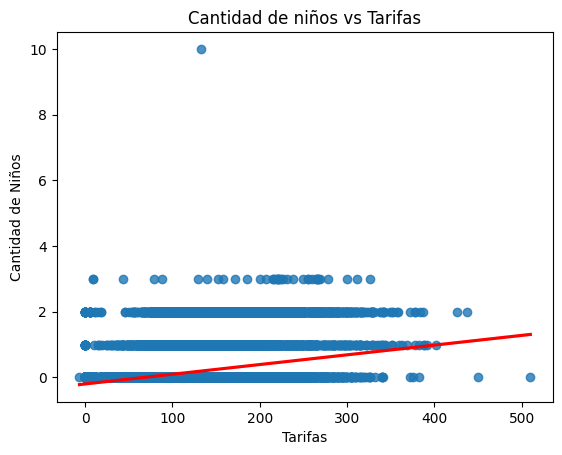

In [375]:
sns.regplot(x=hotel['adr'], y= hotel['children'], line_kws={'color':'red'}).set(xlabel='Tarifas', ylabel='Cantidad de Niños', title= 'Cantidad de niños vs Tarifas')
plt.show()

También poseen una correlacion positiva. Se explica por el hecho de que a mayor cantidad de niños en la reserva, mayor será la tarifa.

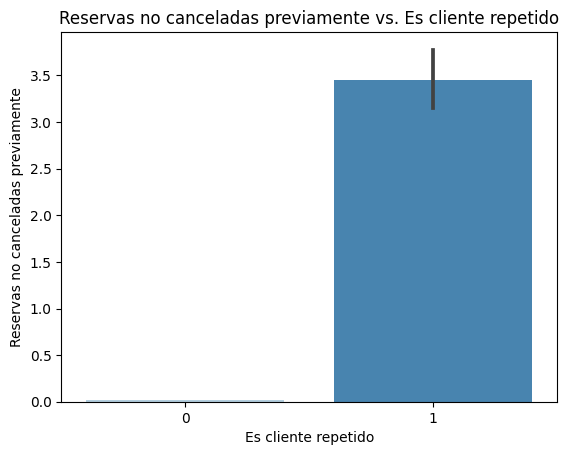

In [376]:
sns.barplot(x=hotel['is_repeated_guest'], y=hotel['previous_bookings_not_canceled'],data=hotel, palette ='Blues').set(xlabel='Es cliente repetido', ylabel='Reservas no canceladas previamente', title= 'Reservas no canceladas previamente vs. Es cliente repetido') 
plt.show()

También podemos ver que hay una correlacion entre estas dos variables ya que las barras tienen una diferencia de altura significativa. Un cliente frecuente del hotel, tendrá varias reservas previas que no fueron canceladas.

#### Relación de variables con el target

([<matplotlib.axis.XTick at 0x200ed7ea310>,
 [Text(0, 0, 'No Cancelada'), Text(1, 0, 'Cancelada')])

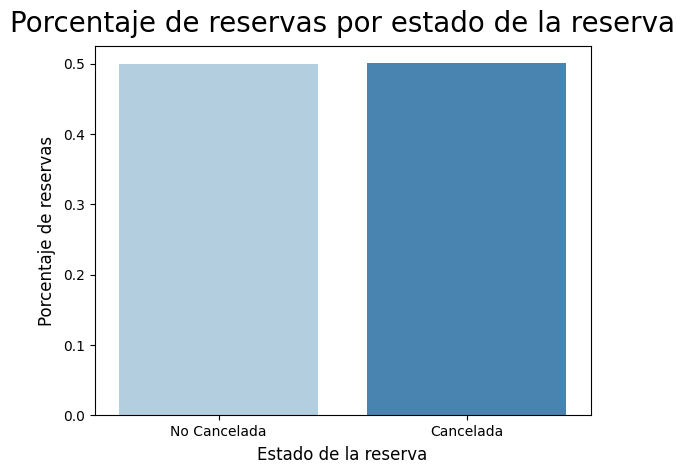

In [377]:
plt.title("Porcentaje de reservas por estado de la reserva", fontsize = 20, pad = 10)
sns.barplot(x=hotel['is_canceled'].unique(), y=hotel['is_canceled'].value_counts(normalize=True), palette='Blues')
plt.xlabel("Estado de la reserva", fontsize = 12, labelpad = 5)
plt.ylabel("Porcentaje de reservas", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['No Cancelada', 'Cancelada'])

Podemos ver que aproximadamente el 50% de las reservas fueron canceladas.

Ahora me quedo solo con las correlaciones entre las variables y nuestro target ``'is_canceled'``

In [378]:
correlacion = hotel.corr()
correlacion['is_canceled'].sort_values(ascending=False).reset_index()

C:\Users\Luca\AppData\Local\Temp\ipykernel_34484\1138499496.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = hotel.corr()


,index,is_canceled
0,is_canceled,1.000000
1,lead_time,0.293816
2,previous_cancellations,0.099613
3,adults,0.060179
4,days_in_waiting_list,0.050827
5,adr,0.049206
6,stays_in_week_nights,0.028439
7,arrival_date_year,0.019923
8,arrival_date_week_number,0.008357
9,children,0.006242


Las grafico también en un heatmap para verlas con mayor claridad

Text(0.5, 1.0, 'Correlacion entre las variables y el target')

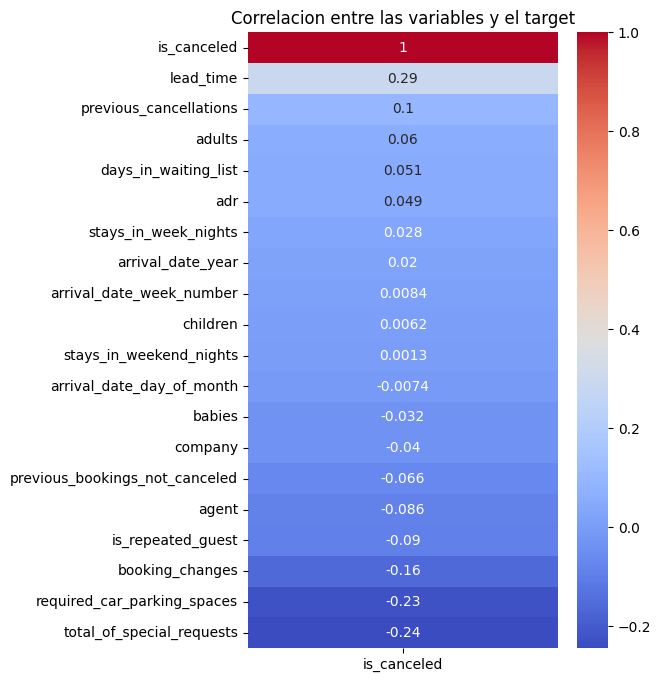

In [379]:
fig = plt.figure(figsize=(5,8))
ax = sns.heatmap(correlacion[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, cmap='coolwarm')
ax.set_title('Correlacion entre las variables y el target', fontsize=12)

- ``'lead_time'`` es la variable que más está correlacionada con ``'is_canceled'``, nuestro target. Tiene sentido que a medida que pasan los días entre que se realiza la reserva y la fecha de llegada, los clientes tienen más tiempo para cancelar la reserva y hay más tiempo para que surja un imprevisto.
- La segunda variable con mayor correlacion con nuestro target es ``'total_of_special_requests'``. Esto podría pensarse como que el hotel tiene en cuenta las necesidades de los clientes y esto podría hacer que el cliente sea menos propenso a cancelar su reserva.
- ``'required_car_parking_spaces'`` es la tercera variable con mayor correlacion con nuestro target. Parecido a lo que ocurre con ``'total_of_special_requests'``, es lógico que si el cliente se compromente con el hotel (pidiendo un espacio de estacionamiento), será menos probable que cancele su reserva.
- El historial de un cliente con el hotel (``'previous_bookings_not_canceled'`` o ``'is_repeated_guest'``) no parece estar muy relacionado con la cancelación de la reserva. Pero, que un cliente ya haya cancelado reservas en el hotel si está más relacionado con la cancelación de la reserva.

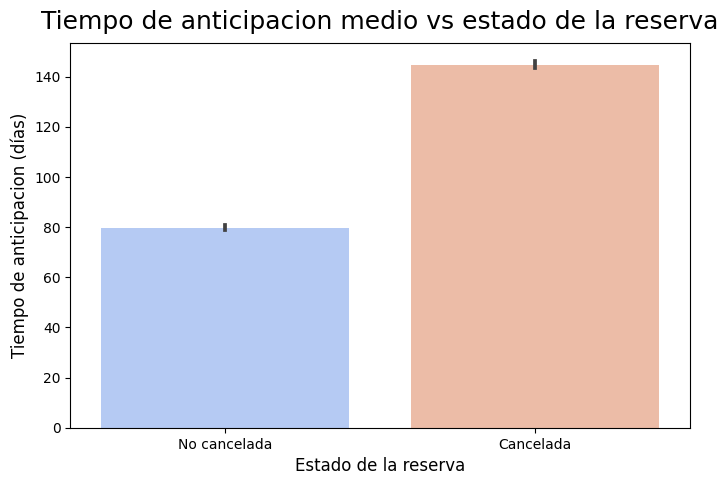

In [380]:
plt.figure(figsize=(8,5)) 
plt.title("Tiempo de anticipacion medio vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['lead_time'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Tiempo de anticipacion (días)", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Las reservas canceladas tienen un tiempo de anticipacion medio más largo.

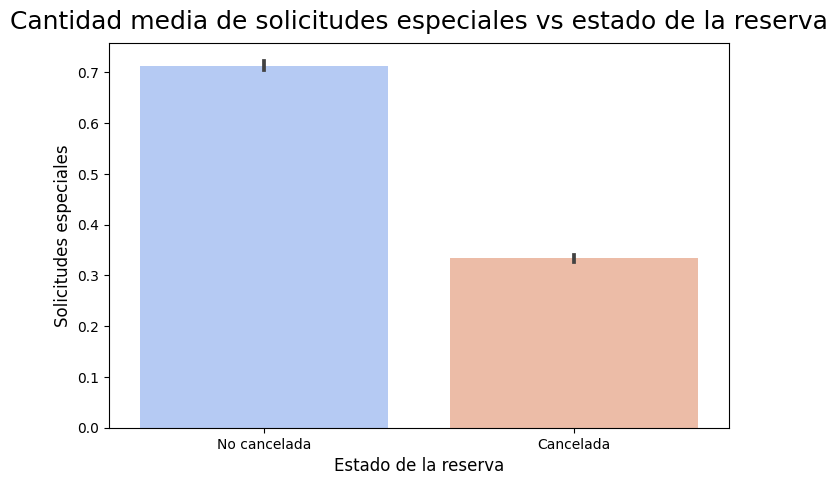

In [381]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de solicitudes especiales vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['total_of_special_requests'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Solicitudes especiales", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que cancelan sus reservas hacen menos peticiones especiales.

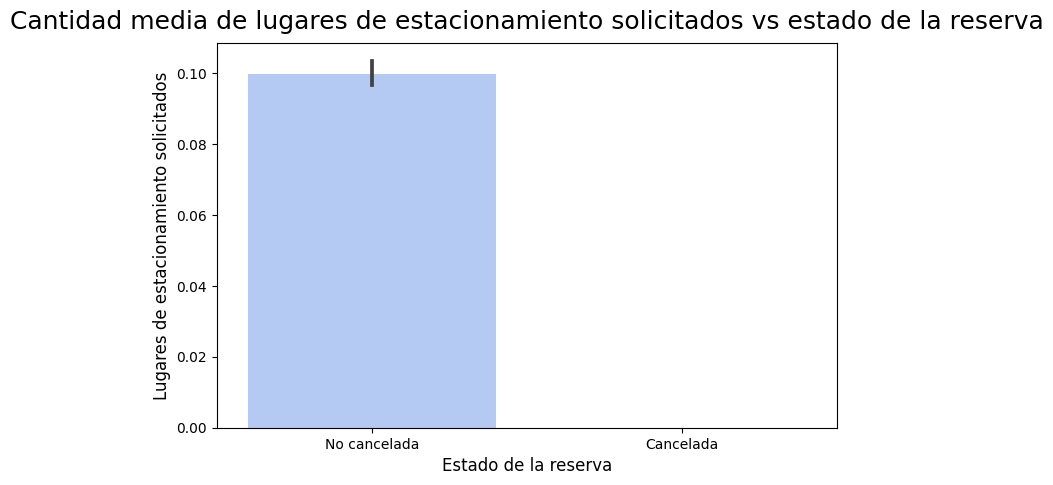

In [382]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de lugares de estacionamiento solicitados vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['required_car_parking_spaces'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Lugares de estacionamiento solicitados", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que no cancelan sus reservas tienden a solicitar más lugares de estacionamiento.

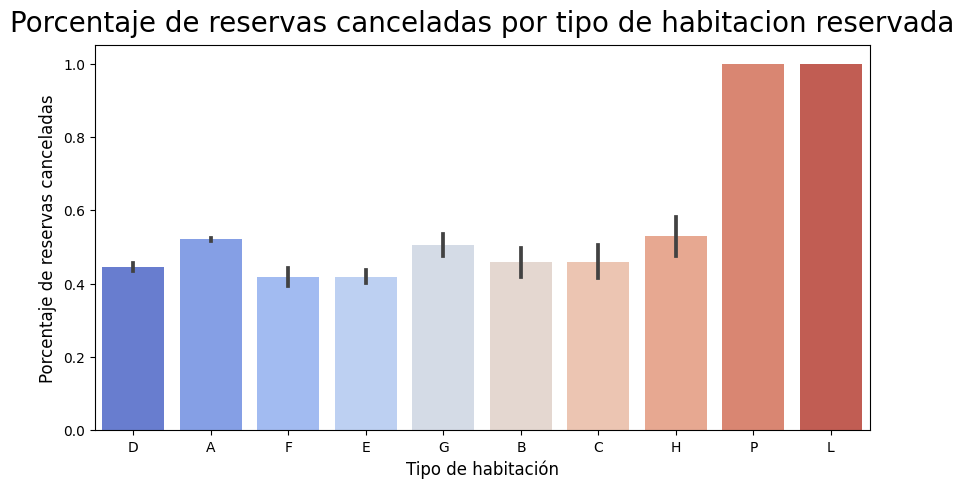

In [383]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de habitacion reservada", fontsize = 20, pad = 10)
sns.barplot(x=hotel['reserved_room_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de habitación", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que reservaron los tipos de habitación P y L tienen el mayor porcentaje de cancelación de reservas, con un 100% de reservas canceladas.

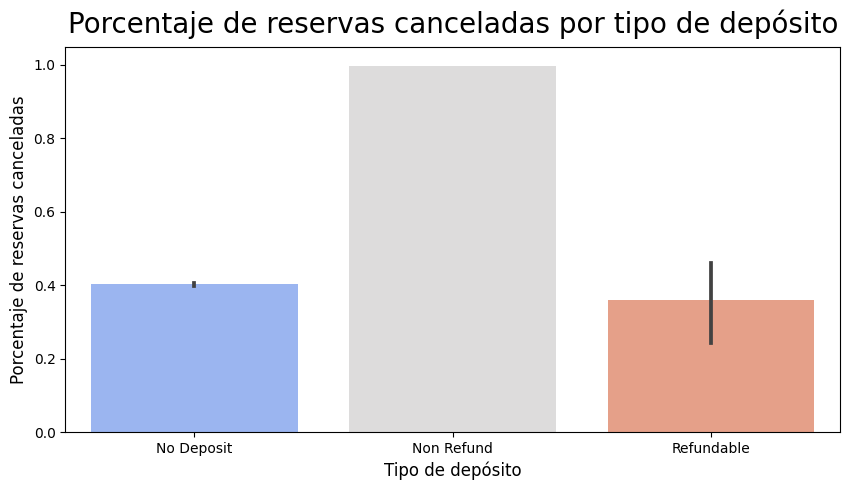

In [384]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de depósito", fontsize = 20, pad = 10)
sns.barplot(x=hotel['deposit_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de depósito", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que pagan un depósito no reembolsable tienen un porcentaje mucho mayor de reservas canceladas.

<Axes: xlabel='customer_type', ylabel='count'>

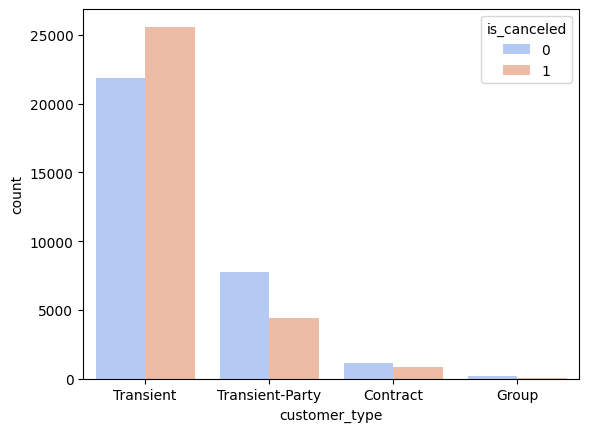

In [385]:
sns.countplot(x='customer_type', data=hotel, hue='is_canceled', palette='coolwarm')

In [386]:
pd.crosstab(hotel['customer_type'], hotel['is_canceled']).apply(lambda x: x/x.sum(), axis=1).sort_values(by=1, ascending=False)

is_canceled,0,1
customer_type,,
Transient,0.460789,0.539211
Contract,0.568126,0.431874
Transient-Party,0.635766,0.364234
Group,0.825095,0.174905


Podemos ver que el tipo de cliente que más cancela sus reservas es el cliente Transient-Party, seguido por el Transient y el Contract. El Group es el que menos cancela sus reservas.

<Axes: xlabel='is_repeated_guest', ylabel='count'>

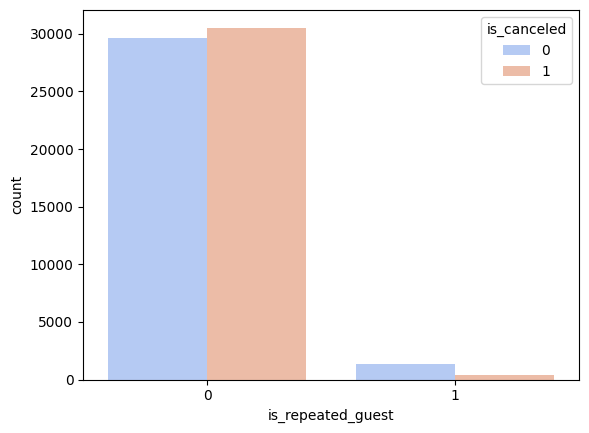

In [387]:
sns.countplot(x='is_repeated_guest', data=hotel, hue='is_canceled', palette='coolwarm')

In [388]:
pd.crosstab(hotel['is_repeated_guest'], hotel['is_canceled']).apply(lambda x: x/x.sum(), axis=1).sort_values(by=1, ascending=False)

is_canceled,0,1
is_repeated_guest,,
0,0.492572,0.507428
1,0.766878,0.233122


Podemos ver que si un cliente ya ha reservado en el hotel, es menos probable que cancele su reserva y si no ha reservado en el hotel, es más probable que cancele su reserva.

### **Visualización de los datos**

En esta sección exploraremos los datos visualmente, para encontrar relaciones entre variables.

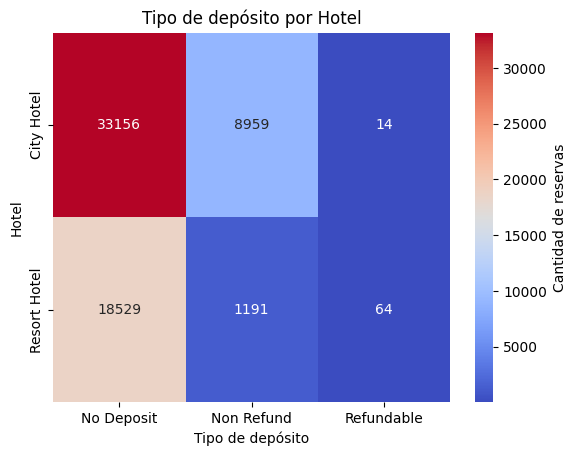

In [389]:
sns.heatmap(pd.crosstab(hotel['hotel'], hotel['deposit_type']), annot=True, fmt='d', cmap='coolwarm').set(xlabel='Tipo de depósito', ylabel='Hotel', title='Tipo de depósito por Hotel')
plt.gca().collections[0].colorbar.set_label('Cantidad de reservas')
plt.show()

Podemos ver que en ambos hoteles, la mayoria de las reservas son sin depósito y luego le siguen las reservas con un depósito sin reembolso. Muy pocas reservas en ambos hoteles tienen un depósito reembolsable.

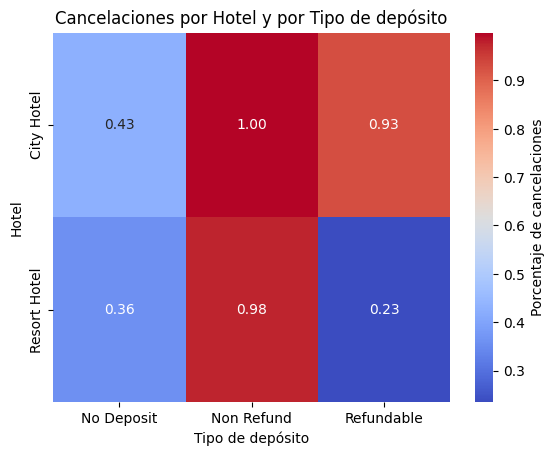

In [390]:
pivot = hotel.pivot_table(index='hotel', columns='deposit_type', values='is_canceled')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Tipo de depósito', ylabel='Hotel', title='Cancelaciones por Hotel y por Tipo de depósito')
plt.gca().collections[0].colorbar.set_label('Porcentaje de cancelaciones')
plt.show()

En ambos hoteles, las reservas realizadas con un depósito sin reembolso son las más canceladas mientras que las reservas realizadas sin depósito son mucho menos canceladas.


También se puede ver que en el City Hotel las reservas con un depósito reembolsable son bastante canceladas.

En el Resort Hotel, las reservas con un depósito reembolsable son las menos canceladas.

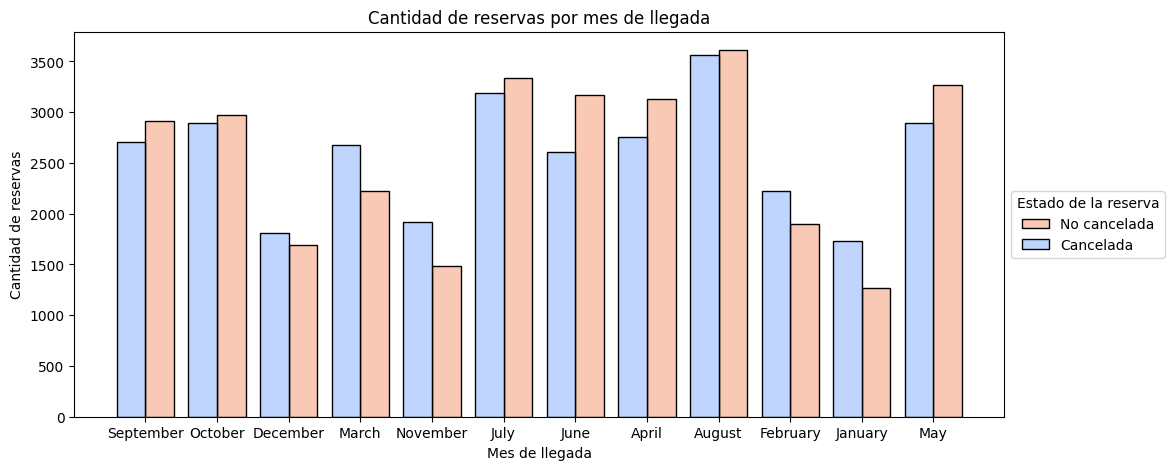

In [391]:
plt.figure(figsize=(12,5))
sns.histplot(x='arrival_date_month', data=hotel, hue='is_canceled', palette='coolwarm', multiple='dodge', shrink=.8).set(xlabel='Mes de llegada', ylabel='Cantidad de reservas', title='Cantidad de reservas por mes de llegada')
plt.gca().legend(['No cancelada', 'Cancelada'], loc='center left', bbox_to_anchor=(1, 0.5), title='Estado de la reserva')
plt.show()


Los meses Agosto y Julio son los meses con más reservas.

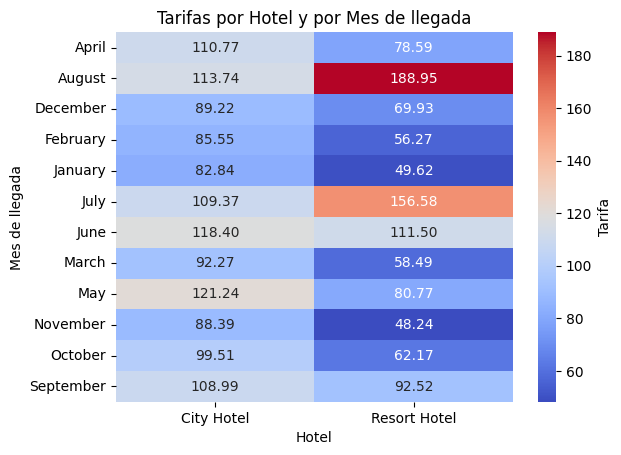

In [392]:
pivot = hotel.pivot_table(index='arrival_date_month', columns='hotel', values='adr')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Hotel', ylabel='Mes de llegada', title='Tarifas por Hotel y por Mes de llegada')
plt.gca().collections[0].colorbar.set_label('Tarifa')
plt.show()

En el City Hotel, el mes con una tarifa promedio mas alta es Mayo, seguida Junio y Agosto. En el Resort Hotel, el mes con una tarifa promedio mas alta es Agosto, seguida por Julio y Junio.

Los meses más baratos para reservar en el City Hotel son Febrero, Enero y Noviembre. En el Resort Hotel, los meses más baratos para reservar son Noviembre, Diciembre y Enero.

In [393]:
hotel.groupby('hotel')['adr'].mean()

hotel
City Hotel      104.858110
Resort Hotel     97.114802
Name: adr, dtype: float64

En promedio el Resort Hotel tiene una tarifa más baja que el City Hotel.

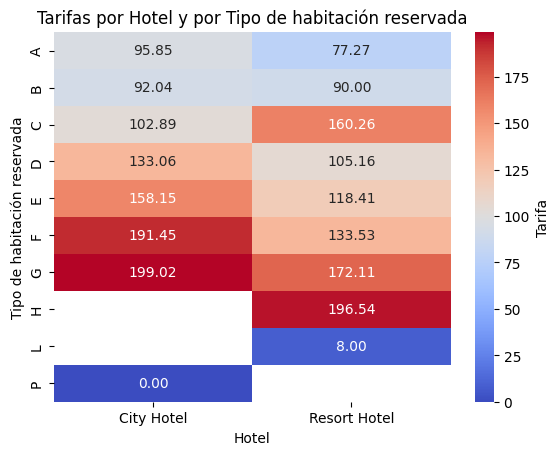

In [394]:
pivot = hotel.pivot_table(index='reserved_room_type', columns='hotel', values='adr')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Hotel', ylabel='Tipo de habitación reservada', title='Tarifas por Hotel y por Tipo de habitación reservada')
plt.gca().collections[0].colorbar.set_label('Tarifa')
plt.show()

Las habitaciones con tarifas mas altas en el City Hotel son las habitaciones tipo G, F y E. En el Resort Hotel, las habitaciones con tarifas mas altas son las habitaciones tipo H, G y C.

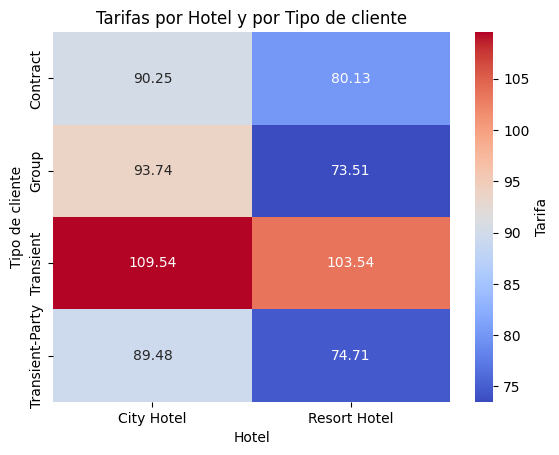

In [395]:
pivot = hotel.pivot_table(index='customer_type', columns='hotel', values='adr')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Hotel', ylabel='Tipo de cliente', title='Tarifas por Hotel y por Tipo de cliente')
plt.gca().collections[0].colorbar.set_label('Tarifa')
plt.show()

Los clientes Transient son los que pagan tarifas más altas en ambos hoteles. Los que pagan tarifas más bajas son los clientes Group en el caso de Resort Hotel y los clientes Transient-Party en el caso de City Hotel.

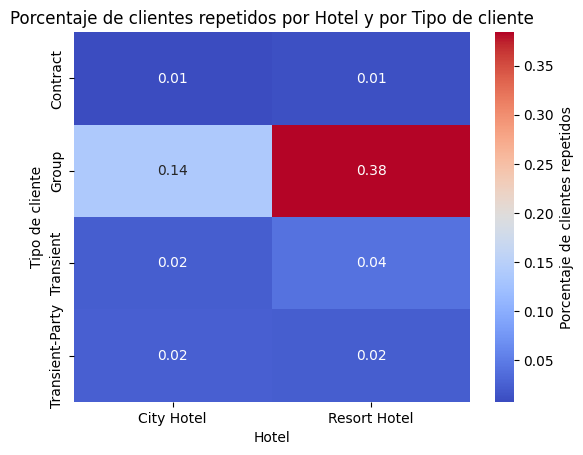

In [396]:
pivot = hotel.pivot_table(index='customer_type', columns='hotel', values='is_repeated_guest')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Hotel', ylabel='Tipo de cliente', title='Porcentaje de clientes repetidos por Hotel y por Tipo de cliente')
plt.gca().collections[0].colorbar.set_label('Porcentaje de clientes repetidos')
plt.show()

Los clientes de tipo Group son el tipo de cliente que más repite hotel al realizar sus reservas mientras que los clientes de tipo Contract son los que menos repiten hotel al realizar sus reservas.

In [397]:
hotel.groupby('hotel')['is_repeated_guest'].mean()

hotel
City Hotel      0.023072
Resort Hotel    0.038465
Name: is_repeated_guest, dtype: float64

También podemos ver que el Resort Hotel tiene un mayor porcentaje de clientes repetidos.

### **Datos faltantes**

Como los modelos de ML no pueden trabajar con datos faltantes, debemos tratarlos de alguna forma.

#### Análisis

Obtengo una tabla con la cantidad y el porcentaje de nulos por columna:

In [398]:
# Obtengo una serie con la suma de nulos por columna.
cols_null = hotel.isna().sum()

# Filtro las columnas para quedarme solo con las que tienen nulos.
# Luego, reseteo el índice y renombro las columnas.
cols_null = cols_null[cols_null > 0].reset_index().rename(
    columns={'index': 'Columna', 0: 'Cant. nulos'})

# Ordeno las columnas por cantidad de nulos.
cols_null = cols_null.sort_values(
    by='Cant. nulos', ascending=False)

# Agrego una columna con el porcentaje de nulos respecto a la cantidad total de datos.
cols_null['% nulos'] = (cols_null['Cant. nulos'] /
                        hotel.shape[0] * 100).round(3)

cols_null

,Columna,Cant. nulos,% nulos
3,company,58761,94.909
2,agent,7890,12.744
1,country,221,0.357
0,children,4,0.006


Entonces, hay 4 columnas que tienen valores nulos:
- ``children`` tiene 4 valores nulos (0,01%)
- ``country`` tiene 221 valores nulos (0,36%)
- ``agent`` tiene 7890 valores nulos (12,7%)
- ``company`` tiene 58761 valores nulos (94,9%)

Grafico los porcentajes de nulos por columna:

<Axes: xlabel='Columna', ylabel='% nulos'>

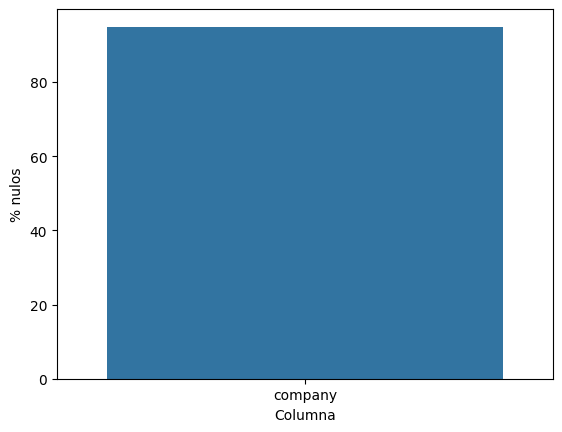

In [399]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'company'])


<Axes: xlabel='Columna', ylabel='% nulos'>

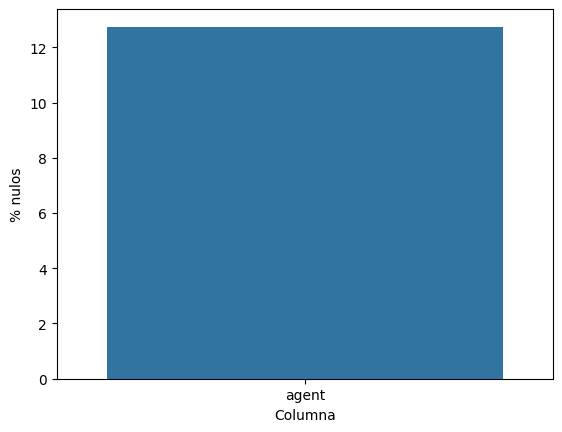

In [400]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'agent'])


<Axes: xlabel='Columna', ylabel='% nulos'>

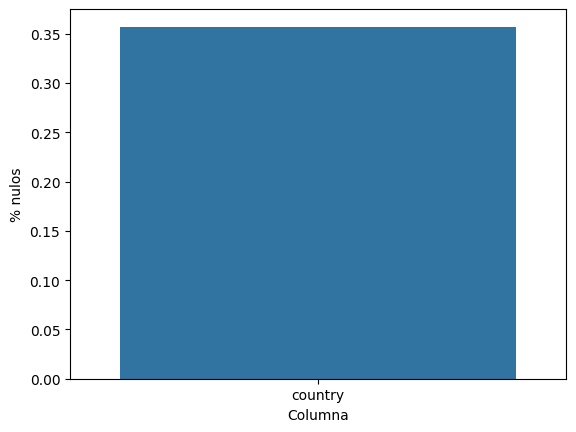

In [401]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'country'])


<Axes: xlabel='Columna', ylabel='% nulos'>

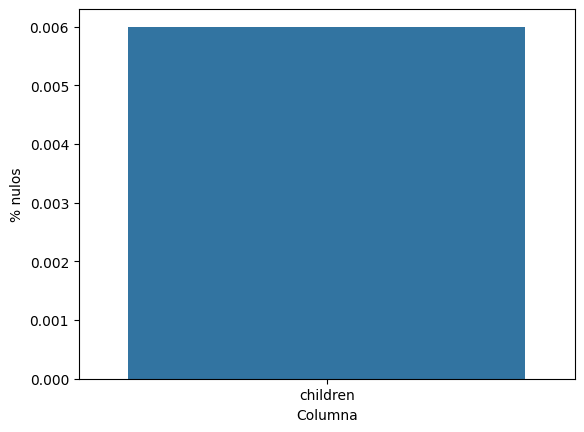

In [402]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'children'])


Viendo el dataset, vimos que existen múltiples columnas con cantidad 0 de adultos. Si bien esto no es un dato nulo, ya que es una cantidad posible, consideramos anormal que ningún adulto esté presente en una reserva. Por lo tanto, consideramos estos datos como faltantes o mal cargados. Veamos cuántas reservas hay de este tipo:

In [403]:
hotel.loc[hotel['adults'] == 0].shape[0]

197

Apenas 197 reservas tienen 0 adultos. Esto representa una cantidad ínfima sobre el total del dataset:

In [404]:
hotel.loc[hotel['adults'] == 0].shape[0] / hotel.shape[0] * 100

0.31818842569411915

Esto representa un 0,32% del total de las reservas, por lo que eliminamos estos registros sin temor a afectar el modelo.

In [405]:
hotel = hotel.loc[hotel['adults'] > 0]

#### Revisión y decisión

##### Nulos en ``children``

Según el paper, no deberían existir valores faltantes. Es raro entonces encontrar que 4 observaciones de la columna ``children`` son raros. Por el ínfimo porcentaje que estos representan, podemos simplemente eliminar las filas que tienen este dato faltante, sin mayores consecuencias.

In [406]:
hotel.dropna(subset=['children'], inplace=True)

In [407]:
print("Cantidad de registros", hotel.shape[0])

Cantidad de registros 61712


Confirmamos que se eliminaron 4 registros del dataset.

##### Nulos en ``country``

El paper también da información al respecto de los valores faltantes en la columna ``country``:
> It is also common for hotels not to know the correct nationality of the customer until the moment of check-in.

Nos aclaran que es común que los hoteles no conozcan la nacionalidad del cliente hasta el momento del check-in. Por ello, podemos asumir que los valores faltantes en esta columna son válidos, y se pueden imputar por un valor que represente este desconocimiento.

Esto resuelve el problema a fines del análisis de los datos, pero no para el entrenamiento del modelo de ML. Una decisión deberá tomarse respecto a estos datos para evitar un sesgo incorrecto en el entrenamiento del modelo, considerando que nacionalidades conocidas recién al momento del check-in bien pudieron haber sido originalmente registradas como desconocidas.

Este hecho puede influenciar la predicción del modelo de forma negativa, insertando un sesgo incorrecto en el entrenamiento del modelo.

Reemplazamos los valores nulos de la columna ``country`` por el valor 'Desconocido'.

In [408]:
# Replace null values in 'country' column with 'Unknown'
hotel['country'].fillna('Desconocido', inplace=True)

##### Nulos en ``company`` y ``agent``

En la columna ``company``, el 95% de los registros tienen ``null`` como valor. En principio, nos inclinamos a pensar que este dato casi no fue registrado, o falta para la mayoría de los registros. Pero revisando el paper, nos encontramos con la siguiente aclaración:

> The PMS assured no missing data exists in its database tables. However, in some categorical
variables like Agent or Company, “NULL” is presented as one of the categories. This should not be
considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

En criollo, nos aclaran que ``null`` en esta columna no debería interpretarse como dato faltante, sino como "no aplica". Para las columnas ``company`` y ``agent``, un valor ``null`` debería entenderse como "no reservó a través de compañía/agente".

Ignorar estos datos puede causar que perdamos información que podría resultar útil para entrenar el modelo. ¿Es posible que exista una correlación entre la compañía usada y la cancelación? ¿Entre el agente y cancelación? ¿Y si en realidad lo que importa es el hecho de reservar por agente, compañía o personalmente; y no específicamente a través de cuál?

Es necesario responder estas preguntas para poder tratar correctamente con estos datos. Se nos ocurren dos alternativas:
- Reconvertir las columnas a un dato booleano, que indique si se usó o no agente/compañía.
- Interpretar a los ``null`` como un agente o compañía más.

La primera opción sería la mejor, se acota considerablemente el rango de valores posibles, pero no se pierde toda la información. Si la cantidad de agentes/compañías repetidos es bajísimo (casi todas las reservas se hacen con agentes/compañías distintas), casi no se podría inferir información. Que una vez un agente haya cancelado, puede sentar un mal precedente, pero de ningún modo se deduce que otra reserva realizada por otro agente, también se cancelará. También, si resulta que todos los agentes/compañías cancelan con más o menos la misma frecuencia; sería un indicador de que el dato específico de quién/cuál agente/compañía reserva es indistinto. Estas opciones indican que se puede simplificar a la primera opción sin pérdida de información.

Si, por el contrario, hay algunos agentes/compañías presentes en muchos registros, y se puede deducir algo de ello, quizás no sea conveniente reconvertir las columnas a booleanos. Si un agente reservó 1000 veces, y canceló 999... ya un sustento más fuerte para creer que volverá a cancelar.

Este análisis corresponde a la etapa de ingeniería de *features*. Por ahora, y con el propósito de avanzar con la limpieza de los datos, reemplazaremos los valores por 'Sin agente' y 'Sin compañía', según corresponda.

In [409]:
hotel['agent'].fillna('Sin agente', inplace=True)

In [410]:
# Replace null values in 'company' column with 'Sin compania'
hotel['company'].fillna('Sin compania', inplace=True)

Finalmente, verificamos que ya no existan valores nulos en el dataset.

In [411]:
hotel.isna().sum().sum()

0

Nuestro dataset parcial ``hotel`` está libre de valores faltantes o nulos.

#### Comparaciones

Una vez eliminados o tratados valores nulos, es necesario volver a examinar la distribución de los datos, para verificar que no hayan sido alterados de forma significativa.

Las columnas modificadas fueron ``country``, ``children``, ``agent`` y ``company``. Veamos cómo se distribuyen ahora.

Por la gran cantidad de países únicos en el dataset, no es posible graficarlos todos. Por ello, graficamos los 15 países con mayor cantidad de registros.

<Axes: xlabel='country', ylabel='count'>

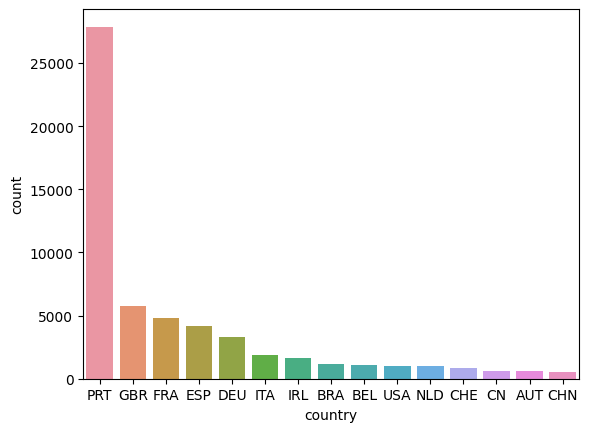

In [412]:
sns.countplot(x='country', data=hotel, order=hotel['country'].value_counts().iloc[:15].index)

No hay cambios apreciables en la distribución de los datos, porque los valores faltantes eran pocos, y fueron corregidos sin alterar los demás registros.

Ahora la distribución de la columna ``children``:

<Axes: xlabel='children', ylabel='count'>

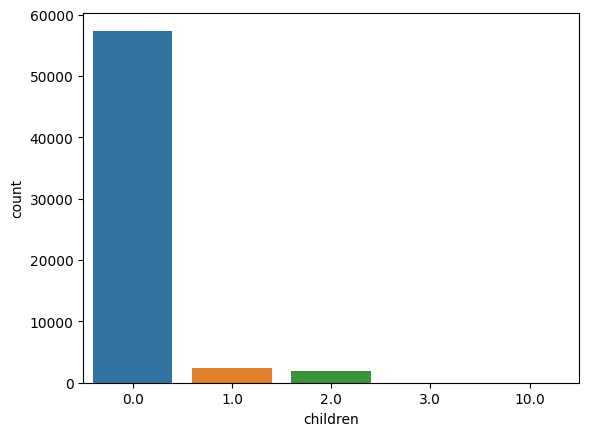

In [413]:
sns.countplot(x='children', data=hotel)

La distribución no cambiar. La cantidad de registros eliminados (4) en irrelevante.

Respecto a la columna ``company``, la distribución es la siguiente:

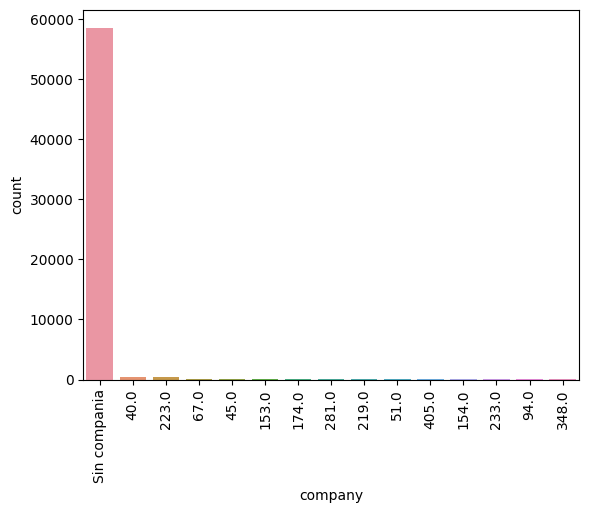

In [414]:
sns.countplot(x='company', data=hotel, order=hotel['company'].value_counts().iloc[:15].index)

plt.xticks(rotation=90)
plt.show()

En este caso la distribución se altera totalmente. Al tener en cuenta los valores faltantes, el valor "Sin compañía" (que eran los nulos), pasó a estar muy representada.

Respecto a la columna ``agent``, la distribución es la siguiente:

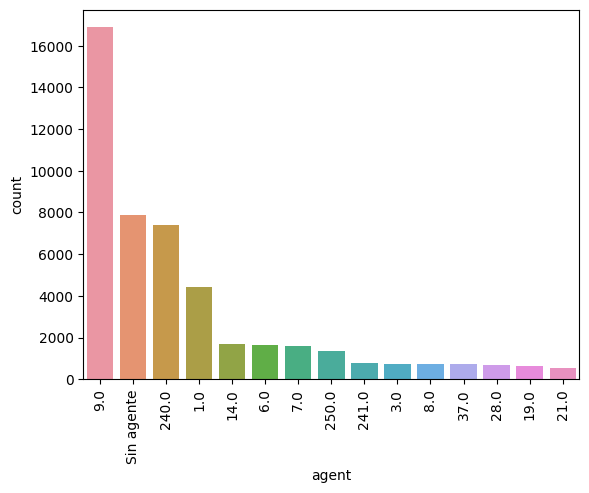

In [415]:
sns.countplot(x='agent', data=hotel, order=hotel['agent'].value_counts().iloc[:15].index)

plt.xticks(rotation=90)
plt.show()

En este caso también se altera la distribución, vemos que "Sin agente" pasó al segundo puesto, pero el agente "índice 9" sigue en el primer lugar, y son comparables en el orden de magnitud.

Concluimos que los cambios realizados no alteraron la distribución de los datos de forma significativa, pero pusieron un evidencia datos que se encontraban "ocultos" por ser nulos.

### **Data cleaning**

#### Tipos de datos

Verificamos los tipos de datos de las variables del dataset.

In [416]:
hotel.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                              object
company                           

Vemos que hay variables que tienen un tipo de dato inconsistente con su contenido.
- ``children`` debería ser de tipo numérico, no tiene sentido que sea de tipo float.

Realizamos la conversión de tipos de datos.

In [417]:
hotel['children'] = hotel['children'].astype('int')

Revisamos nuevamente los tipos de datos:

In [418]:
hotel.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int32
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                              object
company                           

#### Ingeniería de features

En primer lugar, observamos que tenemos tres columnas distintas que representan el año, mes y día de la fecha de llegada de los clientes. Podemos unificarlas en una sola columna, que represente la fecha de llegada.

Combinamos las columnas `'arrival_date_year'`, `'arrival_date_month'`, `'arrival_date_day_of_month'` en una sola columna `'arrival_date'` de tipo datetime, y dropeamos las columnas anteriores.

In [419]:
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month'] + '-' + hotel['arrival_date_day_of_month'].astype(str))

Verificamos que se hayan convertido correctamente:

In [420]:
hotel.arrival_date

0       2016-09-05
1       2015-10-31
2       2016-10-13
3       2016-12-12
4       2017-03-19
           ...    
61908   2017-01-27
61909   2016-09-02
61910   2017-05-08
61911   2015-10-10
61912   2016-04-17
Name: arrival_date, Length: 61712, dtype: datetime64[ns]

Guardamos este dataset intermedio.

In [421]:
# guardar el dataset
hotel.to_csv('Datasets/hotels_cleaned.csv', index=False)

In [422]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61712 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           61712 non-null  object        
 1   lead_time                       61712 non-null  int64         
 2   arrival_date_year               61712 non-null  int64         
 3   arrival_date_month              61712 non-null  object        
 4   arrival_date_week_number        61712 non-null  int64         
 5   arrival_date_day_of_month       61712 non-null  int64         
 6   stays_in_weekend_nights         61712 non-null  int64         
 7   stays_in_week_nights            61712 non-null  int64         
 8   adults                          61712 non-null  int64         
 9   children                        61712 non-null  int32         
 10  babies                          61712 non-null  int64         
 11  me

### **Valores atípicos**

#### Análisis univariado

In [423]:
hotel_cpy = hotel.copy()

##### Outliers univariados en ``'adr'``

Vamos a intentar identificar outliers univariados mediante el análisis de boxplots.

<Axes: ylabel='adr'>

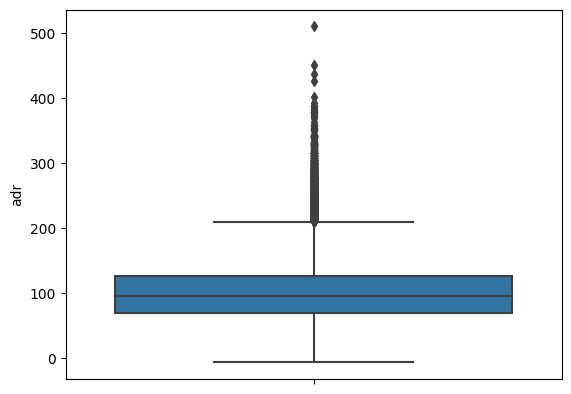

In [424]:
sns.boxplot(y=hotel.adr)

In [425]:
hotel.adr.agg(['min','max']).reset_index()

,index,adr
0,min,-6.38
1,max,510.00


Podemos ver que la variable ``'adr'`` parece tener outliers. Además, vemos que su mínimo es -6.38 y su máximo es 510.

In [426]:
Q1_adr = np.quantile(hotel.adr,0.25)
Q3_adr = np.quantile(hotel.adr,0.75)

IQR_adr = Q3_adr-Q1_adr

out_inf = Q1_adr-1.5*IQR_adr
out_sup = Q3_adr+1.5*IQR_adr
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

Valores por debajo de -14.0 son outliers moderados inferiores.
Valores por arriba de 210.0 son outlier moderados superiores.


In [427]:
out_inf = Q1_adr-3*IQR_adr
out_sup = Q3_adr+3*IQR_adr
print('Valores por debajo de', out_inf, 'son outliers severos inferiores.')
print('Valores por arriba de', out_sup, 'son outlier severos superiores.')

Valores por debajo de -98.0 son outliers severos inferiores.
Valores por arriba de 294.0 son outlier severos superiores.


Considerando estos valores y los max y min de ``'adr'``, podemos ver que tiene outliers superiores tanto moderados como severos, pero no se detectan outliers inferiores.

In [428]:
outliers = hotel[hotel['adr']>294].sort_values(by='adr', ascending=False)
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date
55460,City Hotel,0,2017,May,19,9,0,1,1,0,...,159.0,Sin compania,0,Transient,510.00,0,0,fe474061-f3b2-4e15-8ba0-672366ab7ef1,0,2017-05-09
50240,Resort Hotel,378,2017,August,31,1,4,10,2,0,...,314.0,Sin compania,0,Transient,450.00,0,0,3342817f-3e59-40a4-8b8a-8a7ba49e3184,1,2017-08-01
54002,Resort Hotel,59,2017,August,33,13,2,4,2,2,...,250.0,Sin compania,0,Transient,437.00,0,0,f4678f81-0634-4705-95fb-84262ace90fc,1,2017-08-13
8690,Resort Hotel,31,2017,August,31,1,2,6,2,2,...,250.0,Sin compania,0,Transient,426.25,0,2,ccc86404-4867-4942-b984-b0a0a56451be,0,2017-08-01
60071,Resort Hotel,104,2017,August,33,17,2,3,3,1,...,240.0,Sin compania,0,Transient,402.00,0,1,7948179b-85f7-4764-ae7e-3647bf1693f8,0,2017-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30970,City Hotel,44,2017,April,16,20,0,3,2,2,...,8.0,Sin compania,0,Transient,295.00,0,2,1fb043f6-ee57-450d-871d-05df60730a44,0,2017-04-20
38203,Resort Hotel,109,2017,July,31,30,2,5,2,0,...,240.0,Sin compania,0,Transient,294.86,0,1,3d1ddd9b-4199-4142-bb50-8fb13380c253,1,2017-07-30
61256,City Hotel,18,2017,May,19,10,2,9,2,0,...,8.0,Sin compania,0,Transient,294.55,0,1,8eedbc18-d965-44e8-8a95-17a668f1a772,1,2017-05-10
33083,Resort Hotel,116,2017,August,32,9,2,8,2,1,...,5.0,Sin compania,0,Transient,294.50,0,2,24dfd306-ebd0-44a8-803a-a4720c97aa4a,1,2017-08-09


Ahora probemos calculando el z-score

In [429]:
media_adr =  np.mean(hotel_cpy.adr)
std_adr = np.std(hotel_cpy.adr)
hotel_cpy['z_adr'] = (hotel_cpy.adr - media_adr)/std_adr

In [430]:
hotel_cpy[hotel_cpy['z_adr']>3].sort_values(by='z_adr', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr
55460,City Hotel,0,2017,May,19,9,0,1,1,0,...,Sin compania,0,Transient,510.00,0,0,fe474061-f3b2-4e15-8ba0-672366ab7ef1,0,2017-05-09,8.546685
50240,Resort Hotel,378,2017,August,31,1,4,10,2,0,...,Sin compania,0,Transient,450.00,0,0,3342817f-3e59-40a4-8b8a-8a7ba49e3184,1,2017-08-01,7.288154
54002,Resort Hotel,59,2017,August,33,13,2,4,2,2,...,Sin compania,0,Transient,437.00,0,0,f4678f81-0634-4705-95fb-84262ace90fc,1,2017-08-13,7.015473
8690,Resort Hotel,31,2017,August,31,1,2,6,2,2,...,Sin compania,0,Transient,426.25,0,2,ccc86404-4867-4942-b984-b0a0a56451be,0,2017-08-01,6.789986
60071,Resort Hotel,104,2017,August,33,17,2,3,3,1,...,Sin compania,0,Transient,402.00,0,1,7948179b-85f7-4764-ae7e-3647bf1693f8,0,2017-08-17,6.281330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,Resort Hotel,39,2016,August,35,24,2,4,2,0,...,Sin compania,0,Transient,246.00,0,2,3d5cf86c-81ad-4b75-a6b4-136fc20437a1,0,2016-08-24,3.009150
865,Resort Hotel,99,2016,December,53,26,2,5,3,1,...,Sin compania,0,Transient,246.00,0,0,6b240e49-43ee-4b21-aa7f-1f33cd24f707,0,2016-12-26,3.009150
2391,Resort Hotel,37,2016,August,32,5,0,2,2,0,...,Sin compania,0,Transient,246.00,0,2,a5e78e7e-1ecc-48c7-a358-fa4120fbf1f6,0,2016-08-05,3.009150
42676,City Hotel,40,2016,August,33,13,1,1,2,2,...,Sin compania,0,Transient,245.95,1,0,8d33fffb-537c-42e8-ba6b-ca2f9f8caa4c,0,2016-08-13,3.008101


In [431]:
hotel_cpy[hotel_cpy['z_adr']<-3]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr


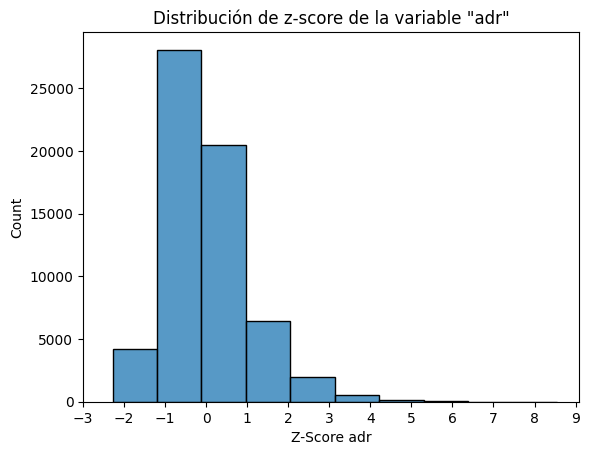

In [432]:
sns.histplot(hotel_cpy.z_adr, bins=10).set(title='Distribución de z-score de la variable "adr"', xlabel='Z-Score adr')

plt.xticks(np.arange(-3, 10, 1))
plt.show()

Concluimos en que se detectan outliers superiores, pero no inferiores.

Teniendo en cuenta el análisis del boxplot y el cálculo del z-score, voy a proceder a eliminar los outliers superiores de ``'adr'`` que posean un z-score mayor a 3.

In [433]:
hotel.shape

(61712, 32)

In [434]:
# eliminar de hotel las filas que tengan z_adr > 3
hotel = hotel[hotel_cpy['z_adr']<=3]
hotel.shape

(60938, 32)

In [435]:
hotel[hotel['adr'] <= 0].sort_values(by='adr', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date
21124,Resort Hotel,195,2017,March,10,5,4,6,2,0,...,273.0,Sin compania,0,Transient-Party,-6.38,0,0,869f627f-35fb-42b0-8376-12869739d76e,0,2017-03-05
41379,City Hotel,0,2016,February,6,3,0,1,1,0,...,Sin agente,45.0,0,Transient,0.00,0,2,f7daa80b-f59a-47d8-af08-85f2a42d7538,0,2016-02-03
41388,Resort Hotel,342,2015,July,27,1,0,0,2,0,...,Sin agente,Sin compania,0,Transient,0.00,0,0,ab852683-5696-436d-a21b-367c9571323a,0,2015-07-01
41476,Resort Hotel,4,2015,December,50,11,0,2,2,0,...,Sin agente,Sin compania,0,Transient,0.00,0,0,a530ab19-c34f-4041-b757-bff1f76e9486,0,2015-12-11
41642,Resort Hotel,0,2016,February,9,22,0,0,2,0,...,241.0,Sin compania,0,Transient,0.00,0,1,0c268c34-c725-4108-93f3-521cb3eadf1b,0,2016-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19561,Resort Hotel,9,2015,November,47,21,0,1,2,0,...,Sin agente,Sin compania,0,Transient,0.00,0,1,016e4a9a-be20-480f-80de-ba05e39cf84d,0,2015-11-21
19653,City Hotel,0,2016,September,39,18,2,0,1,0,...,Sin agente,45.0,0,Transient,0.00,0,0,ee52bafd-abea-40e5-b50f-aafb29128ec8,0,2016-09-18
19707,Resort Hotel,89,2016,July,29,14,0,0,2,0,...,250.0,Sin compania,0,Transient,0.00,0,0,be06dd0d-ef5e-4f67-8734-2c1d25552e7e,0,2016-07-14
18893,Resort Hotel,254,2015,September,37,12,2,2,2,0,...,15.0,Sin compania,0,Transient-Party,0.00,0,0,cf9a299d-b77b-4f46-a4fc-3aa1cd8a39ec,0,2015-09-12


A pesar de que no se detectan outliers inferiores en ``'adr'``, vieos que hay columnas que tienen un adr negativo o cero. Estas filas también las voy a eliminar ya que no tiene sentido una tarifa negativa o cero.

In [436]:
hotel.drop(hotel.loc[hotel['adr'] <= 0].index, inplace=True)
hotel.shape

(60119, 32)

##### Outliers univariados en ``'children'``

<Axes: ylabel='children'>

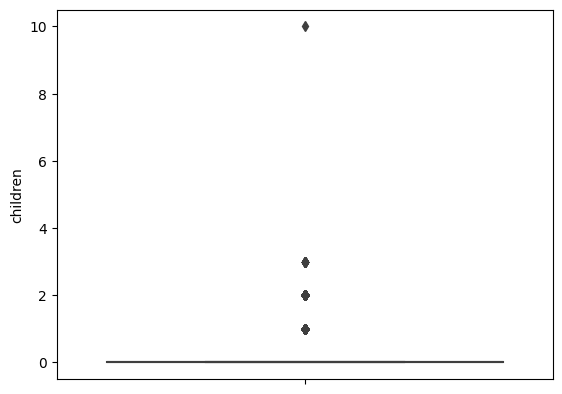

In [437]:
sns.boxplot(y=hotel.children)

In [438]:
hotel.children.agg(['min','max']).reset_index()

,index,children
0,min,0
1,max,10


In [439]:
#z-score
media_children =  np.mean(hotel_cpy.children)
std_children = np.std(hotel_cpy.children)
hotel_cpy['z_children'] = (hotel_cpy.children - media_children)/std_children

In [440]:
hotel_cpy[hotel_cpy['z_children']>3].sort_values(by='z_children', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children
49181,Resort Hotel,55,2015,July,29,12,4,10,2,10,...,0,Contract,133.16,0,1,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1,2015-07-12,0.642274,25.104976
61903,City Hotel,140,2017,June,26,28,0,3,2,3,...,0,Transient,220.00,0,0,a24e074b-8bbc-47ab-9154-70592f1fac09,0,2017-06-28,2.463787,7.351722
56197,City Hotel,114,2016,August,32,2,0,2,2,3,...,0,Transient,266.30,0,0,2f0e1617-305e-4be9-b643-e2e06847afca,1,2016-08-02,3.434953,7.351722
29295,City Hotel,109,2017,June,26,25,2,1,2,3,...,0,Transient,255.00,0,3,f9596bc3-2bb9-4ed3-ae3f-553ab556b0ac,1,2017-06-25,3.197930,7.351722
35006,City Hotel,178,2016,July,30,20,0,2,2,3,...,0,Transient,221.00,0,2,3faa4295-8ae1-4859-8035-3dafdb2d02f0,0,2016-07-20,2.484762,7.351722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21162,City Hotel,37,2017,May,22,29,1,2,2,2,...,0,Transient,270.00,0,0,79ba9158-b984-4c12-968a-affeeea54b6f,1,2017-05-29,3.512562,4.815543
21144,City Hotel,56,2016,December,52,19,1,0,2,2,...,0,Transient,156.60,0,1,87c3156d-d385-4597-9f78-55c808b9195c,1,2016-12-19,1.133940,4.815543
21104,Resort Hotel,164,2017,August,32,8,0,4,2,2,...,0,Transient,227.00,1,2,6dcb6d20-eaa1-4983-856d-92d73b61b5ba,0,2017-08-08,2.610616,4.815543
21074,Resort Hotel,34,2015,August,33,14,0,2,2,2,...,0,Transient,271.00,0,0,fb001f78-9a22-435d-ae32-7e38236fb2d1,1,2015-08-14,3.533538,4.815543


In [441]:
hotel_cpy[hotel_cpy['z_children']<3].sort_values(by='z_children', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05,0.271846,-0.256815
40806,City Hotel,0,2017,August,34,20,1,0,3,0,...,0,Transient,198.00,0,0,dcbf73ca-eaee-43f1-82cb-f5f98405d8aa,0,2017-08-20,2.002326,-0.256815
40808,City Hotel,5,2016,April,17,20,0,3,1,0,...,0,Transient,95.00,0,0,24dd1841-0bc0-46f5-b3e7-1fcafddc8766,0,2016-04-20,-0.158152,-0.256815
40809,City Hotel,94,2016,March,14,28,1,5,2,0,...,0,Transient-Party,110.75,0,1,da04f043-f93e-41ef-b7f4-0fcd1b3a8184,0,2016-03-28,0.172212,-0.256815
40810,City Hotel,286,2016,October,43,16,1,0,2,0,...,0,Transient,90.00,0,0,d6b9ea83-28c0-46f4-93b5-326663fbf1a1,1,2016-10-16,-0.263029,-0.256815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32889,City Hotel,101,2016,July,29,11,1,2,2,1,...,0,Transient,84.58,0,0,20c57acd-e0f4-4cbb-91d3-dd9a3e723923,0,2016-07-11,-0.376717,2.279364
20859,Resort Hotel,1,2017,January,3,19,2,5,2,1,...,0,Transient,88.00,0,2,eafcd086-cad5-4b2a-9003-b79ce6898e19,0,2017-01-19,-0.304981,2.279364
6599,Resort Hotel,6,2016,October,45,31,1,0,3,1,...,0,Transient-Party,145.00,1,0,f6bfceb1-4350-4346-add1-b12731e4029b,0,2016-10-31,0.890624,2.279364
24272,City Hotel,84,2015,July,30,25,0,1,2,1,...,0,Transient,94.00,0,2,779ed0c7-2a97-452f-a13c-6bab14793d4b,0,2015-07-25,-0.179127,2.279364


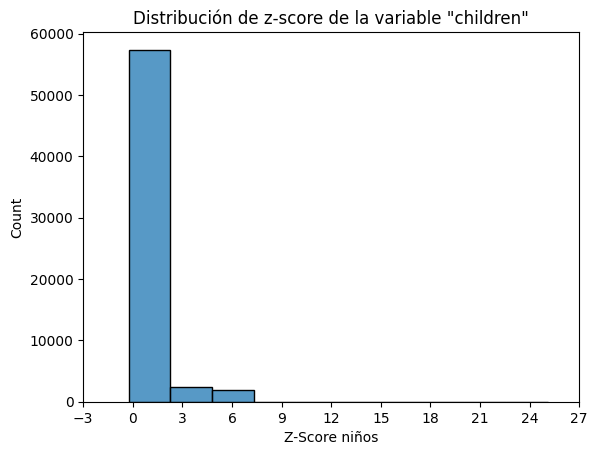

In [442]:
sns.histplot(hotel_cpy.z_children, bins=10).set(title='Distribución de z-score de la variable "children"', xlabel='Z-Score niños')

plt.xticks(np.arange(-3, 30, 3))

plt.show()

En esta variable, se detectan muchos outliers que yo no consideraría ya que son valores normales que puede tomar la variable. Por ejemplo, hay reservas que tienen 0 niños o 3 niños que con el cálculo del z-score aparecen como outliers y sin embargo, son valores válidos. 

Hay una sola reserva que tiene 10 niños, esto lo voy a tomar como un valor atípico y voy a eliminar esta fila.

In [443]:
hotel.shape

(60119, 32)

In [444]:
hotel.drop(hotel[hotel['children'] == 10].index, inplace=True)

In [445]:
hotel.shape

(60118, 32)

##### Outliers univariados en ``'babies'``

<Axes: ylabel='babies'>

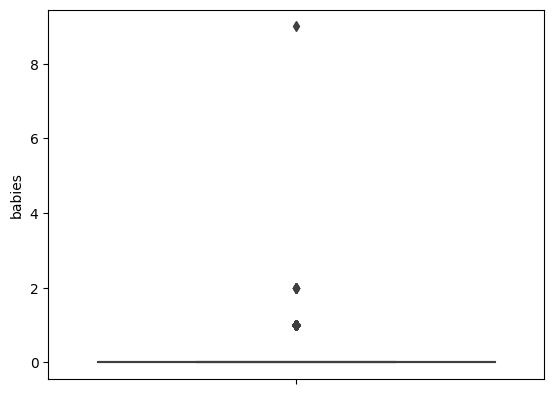

In [446]:
sns.boxplot(y=hotel.babies)

In [447]:
hotel.babies.agg(['min','max']).reset_index()

,index,babies
0,min,0
1,max,9


In [448]:
#z-score
media_babies = np.mean(hotel_cpy.babies)
std_babies = np.std(hotel_cpy.babies)
hotel_cpy['z_babies'] = (hotel_cpy.babies - media_babies)/std_babies

In [449]:
hotel_cpy[hotel_cpy['z_babies']>3].sort_values(by='z_babies', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children,z_babies
12659,City Hotel,11,2015,October,42,11,2,1,1,0,...,Transient-Party,95.0,0,0,a864cf91-980a-48da-9b71-c0b487096239,0,2015-10-11,-0.158152,-0.256815,97.514787
47646,Resort Hotel,345,2016,September,36,1,2,7,2,0,...,Transient,145.0,0,1,a20ef39a-c517-4393-9284-1d2b365b5b2b,1,2016-09-01,0.890624,-0.256815,21.609546
38639,Resort Hotel,21,2015,July,28,10,2,3,2,0,...,Transient,165.0,1,3,a290f8ad-eb18-4b2f-b488-abed0f1411a8,0,2015-07-10,1.310134,-0.256815,21.609546
6675,City Hotel,13,2017,March,11,18,0,1,2,1,...,Transient,152.0,1,2,ab8888e4-9a15-4f6f-b5ab-18ce275944e5,0,2017-03-18,1.037452,2.279364,21.609546
47353,City Hotel,11,2016,September,39,20,0,2,2,0,...,Transient,248.0,0,2,7bfd67d5-c86b-49f2-a336-61781a6cb3f8,0,2016-09-20,3.051101,-0.256815,21.609546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20232,Resort Hotel,124,2016,May,21,18,0,4,2,0,...,Transient,60.0,0,2,502fc957-3d67-4e59-bf85-dc37f0420179,0,2016-05-18,-0.892295,-0.256815,10.765941
19740,Resort Hotel,1,2017,February,5,4,0,1,2,0,...,Transient,55.0,1,0,4c4ed701-7b16-455f-83ae-4e345d5cef86,0,2017-02-04,-0.997172,-0.256815,10.765941
19480,Resort Hotel,13,2016,June,24,8,0,4,2,1,...,Transient,166.0,1,1,2adafcea-d219-497b-afb6-f3c4f3275ded,0,2016-06-08,1.331109,2.279364,10.765941
19435,Resort Hotel,25,2016,September,37,4,2,4,2,1,...,Transient,214.0,0,2,24893642-2a2c-4866-b009-5c7368c4a295,0,2016-09-04,2.337934,2.279364,10.765941


In [450]:
hotel_cpy[hotel_cpy['z_babies']<3].sort_values(by='z_babies', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children,z_babies
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05,0.271846,-0.256815,-0.077665
41262,City Hotel,279,2015,July,30,23,0,2,2,0,...,Contract,62.00,0,0,5cf3d7a0-1183-4af0-ab01-b22a2f5ecab8,1,2015-07-23,-0.850344,-0.256815,-0.077665
41263,City Hotel,167,2017,June,25,19,1,5,3,0,...,Transient,189.00,0,0,d4abf66f-4aa4-4949-92b4-8bc7b0be017c,1,2017-06-19,1.813546,-0.256815,-0.077665
41264,Resort Hotel,183,2016,April,16,16,1,1,1,0,...,Transient-Party,54.50,0,0,8540544d-b7f7-4b32-a9c1-4f73e4941dcf,0,2016-04-16,-1.007660,-0.256815,-0.077665
41265,City Hotel,284,2017,April,17,27,0,3,1,1,...,Transient,126.00,0,0,ad0fb918-23ae-42b5-a312-712b7cc067d9,1,2017-04-27,0.492089,2.279364,-0.077665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20636,Resort Hotel,339,2017,June,24,13,2,8,2,0,...,Transient,74.25,0,1,a66e4b37-e9f1-4695-b529-da62e355706a,0,2017-06-13,-0.593394,-0.256815,-0.077665
20638,City Hotel,174,2016,June,24,5,2,0,2,0,...,Transient-Party,115.20,0,0,02f50545-01ee-4fea-ac50-e7c98ed1c44e,0,2016-06-05,0.265553,-0.256815,-0.077665
20639,Resort Hotel,320,2017,July,27,2,4,7,2,0,...,Transient,150.22,0,1,568f2dc8-395b-4b2e-a18d-986a21ab4cb2,1,2017-07-02,1.000116,-0.256815,-0.077665
20626,Resort Hotel,46,2016,November,45,1,2,5,2,0,...,Transient,37.80,0,0,d2df57ad-919d-46ee-960d-720392d3a8e6,1,2016-11-01,-1.357951,-0.256815,-0.077665


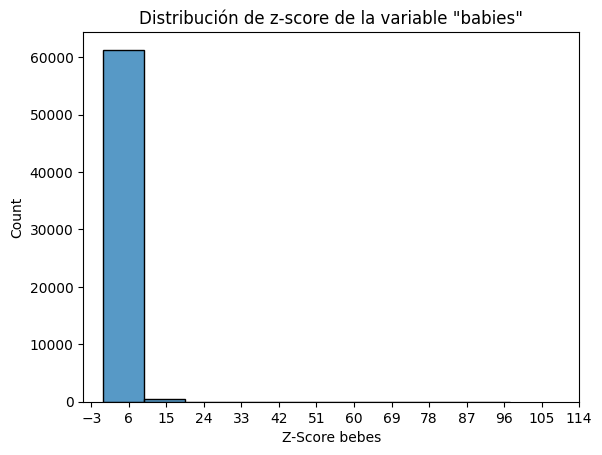

In [451]:
sns.histplot(hotel_cpy.z_babies, bins=10).set(title='Distribución de z-score de la variable "babies"', xlabel='Z-Score bebes')

plt.xticks(np.arange(-3, 120, 9))

plt.show()

En este caso ocurre algo similar a la variable ``'children'``. Hay reservas que tienen 0 bebés o 3 bebés que con el cálculo del z-score aparecen como outliers y sin embargo, son valores válidos.

In [452]:
# ver bebes y zscore
hotel_cpy[['babies', 'z_babies']].sort_values(by='z_babies', ascending=False)

,babies,z_babies
12659,9,97.514787
50487,2,21.609546
47646,2,21.609546
38639,2,21.609546
48607,2,21.609546
...,...,...
20711,0,-0.077665
20712,0,-0.077665
20713,0,-0.077665
20714,0,-0.077665


Podemos ver que hay una sola reserva con un valor mucho más grande que las demás. Voy a eliminar esta fila ya que lo considero un valor atípico comparado con los demás valores.

In [453]:
hotel.shape

(60118, 32)

In [454]:
hotel.drop(hotel[hotel['babies'] == 9].index, inplace=True)
hotel.shape

(60117, 32)

##### Outliers univariados en ``'adults'``

<Axes: ylabel='adults'>

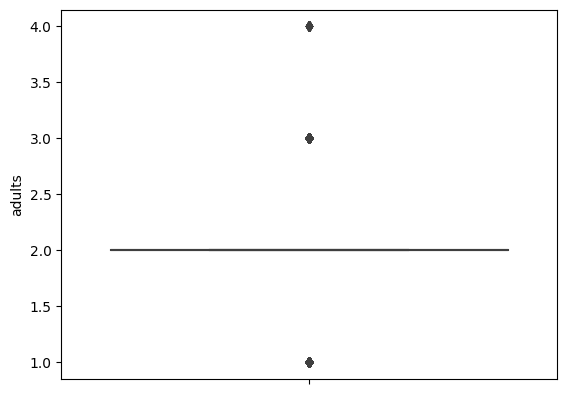

In [455]:
sns.boxplot(y=hotel.adults)

In [456]:
hotel.adults.agg(['min','max']).reset_index()

,index,adults
0,min,1
1,max,4


In [457]:
#z-score
media_adults = np.mean(hotel_cpy.adults)
std_adults = np.std(hotel_cpy.adults)
hotel_cpy['z_adults'] = (hotel_cpy.adults - media_adults)/std_adults

In [458]:
hotel_cpy[hotel_cpy['z_adults']>3].sort_values(by='z_adults', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children,z_babies,z_adults
59165,Resort Hotel,338,2015,October,41,4,2,0,55,0,...,0.00,0,0,9bf89c35-d6aa-4dfb-a0cb-2a3eb30bafd2,1,2015-10-04,-2.150825,-0.256815,-0.077665,91.525477
4064,Resort Hotel,304,2015,September,36,3,0,3,40,0,...,0.00,0,0,ebb06f2f-1c79-490c-ae9f-8f7ba838d328,1,2015-09-03,-2.150825,-0.256815,-0.077665,65.686048
55112,Resort Hotel,349,2015,September,39,21,1,3,27,0,...,0.00,0,0,6ed0d330-fea1-4b4e-b9e8-cbdcdc514d7c,1,2015-09-21,-2.150825,-0.256815,-0.077665,43.291875
38305,Resort Hotel,340,2015,September,37,12,2,5,26,0,...,0.00,0,0,f386dc39-94e7-4b56-9609-d12d80d9a6a8,1,2015-09-12,-2.150825,-0.256815,-0.077665,41.569247
59059,Resort Hotel,333,2015,September,36,5,2,5,26,0,...,0.00,0,0,62e325e1-4d46-4794-8d32-100a756074db,1,2015-09-05,-2.150825,-0.256815,-0.077665,41.569247
19146,Resort Hotel,354,2015,September,39,26,2,5,26,0,...,0.00,0,0,edcaa4e3-8b46-4812-9d09-672cd8b73589,1,2015-09-26,-2.150825,-0.256815,-0.077665,41.569247
11830,Resort Hotel,334,2015,October,42,12,2,5,20,0,...,0.00,0,0,b169d836-a93c-43a3-8bb4-9ec2afa66483,1,2015-10-12,-2.150825,-0.256815,-0.077665,31.233475
35477,Resort Hotel,334,2015,October,42,12,2,5,10,0,...,0.00,0,0,a2928fc5-26a1-4e9c-9be9-1d89f03dccf5,1,2015-10-12,-2.150825,-0.256815,-0.077665,14.007188
13101,Resort Hotel,328,2015,October,41,6,2,5,6,0,...,0.00,0,0,653ecbda-b99c-4aaf-b118-3c1877b57abb,1,2015-10-06,-2.150825,-0.256815,-0.077665,7.116674
3962,Resort Hotel,328,2015,October,41,6,2,5,5,0,...,0.00,0,0,54e377ff-6236-44f0-81e7-ab8750d6998a,1,2015-10-06,-2.150825,-0.256815,-0.077665,5.394045


In [459]:
hotel_cpy[hotel_cpy['z_adults']<3].sort_values(by='z_adults', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children,z_babies,z_adults
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05,0.271846,-0.256815,-0.077665,-1.496469
52101,Resort Hotel,1,2016,December,51,15,0,0,1,0,...,0.0,1,0,8861ef7a-6a5e-4e77-a1e9-f6f42e516e0c,0,2016-12-15,-2.150825,-0.256815,-0.077665,-1.496469
11515,Resort Hotel,3,2016,February,8,15,1,2,1,0,...,30.0,0,0,518083c6-d91b-4662-bf1f-be97360776ec,0,2016-02-15,-1.521560,-0.256815,-0.077665,-1.496469
11517,City Hotel,0,2016,October,42,12,0,1,1,0,...,160.0,0,0,ef7a57a8-f037-46b6-9ea5-6ba7bb4909e5,0,2016-10-12,1.205256,-0.256815,-0.077665,-1.496469
52098,Resort Hotel,41,2015,November,46,12,1,3,1,0,...,52.2,0,0,587a8f94-5f11-4714-aa4a-f202e74ac218,1,2015-11-12,-1.055904,-0.256815,-0.077665,-1.496469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13643,Resort Hotel,2,2017,February,8,23,0,2,3,0,...,82.5,0,0,d75e99ea-8568-4c7d-8f79-91e1f4bf8ca3,0,2017-02-23,-0.420346,-0.256815,-0.077665,1.948788
37247,City Hotel,177,2017,July,27,3,1,1,3,0,...,156.6,0,0,82e01eed-e234-49c1-aff3-e0e8cc282180,1,2017-07-03,1.133940,-0.256815,-0.077665,1.948788
43714,City Hotel,109,2016,August,35,24,0,4,3,0,...,152.1,0,0,dc605741-aff2-4c98-98ce-8c6a3d18efba,1,2016-08-24,1.039550,-0.256815,-0.077665,1.948788
28858,Resort Hotel,16,2016,July,30,23,2,6,3,0,...,215.0,0,2,2e0139b1-2c5b-466f-a213-5a116ddd236d,0,2016-07-23,2.358909,-0.256815,-0.077665,1.948788


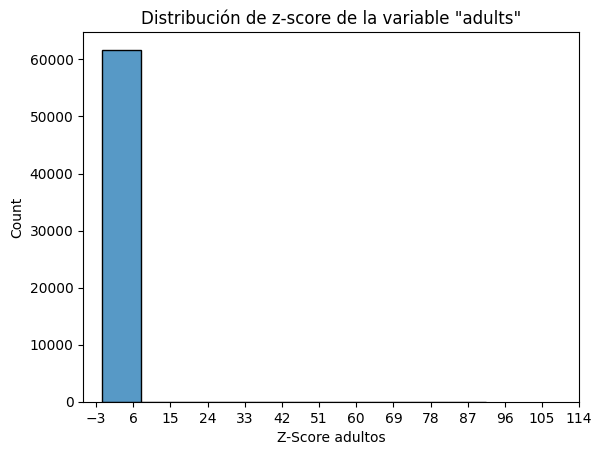

In [460]:
sns.histplot(hotel_cpy.z_adults, bins=10).set(title='Distribución de z-score de la variable "adults"', xlabel='Z-Score adultos')

plt.xticks(np.arange(-3, 120, 9))

plt.show()

En el caso de la variable ``'adults'`` ocurre algo similar a las variables ``'children'`` y ``'babies'``. Hay reservas que tienen 0 adultos o 2 adultos que con el cálculo del z-score aparecen como outliers y sin embargo, son valores válidos.

In [461]:
pd.crosstab(hotel_cpy[hotel_cpy['customer_type'] == 'Group']['adults'], hotel_cpy[hotel_cpy['customer_type'] == 'Group']['customer_type'])

customer_type,Group
adults,
1,78
2,167
3,5
5,2
6,1
10,1
20,1
26,3
27,1


In [462]:
hotel[hotel['adults'] > 4].shape[0]/hotel.shape[0]

0.0

Podemos ver que las reservas con mayor cantidad de adultos provienen del tipo de cliente Group, sin embargo estas representan una pequeña porcion de la totalidad de reservas realizadas por groups. Por lo tanto, voy a eliminar las filas con adultos > 4 ya que considero que son valores atípicos.

In [463]:
hotel.shape

(60117, 32)

In [464]:
hotel.drop(hotel[hotel['adults'] > 4].index, inplace=True)
hotel.shape

(60117, 32)

##### Outliers univariados en ``'previous_cancellations'``

<Axes: ylabel='previous_cancellations'>

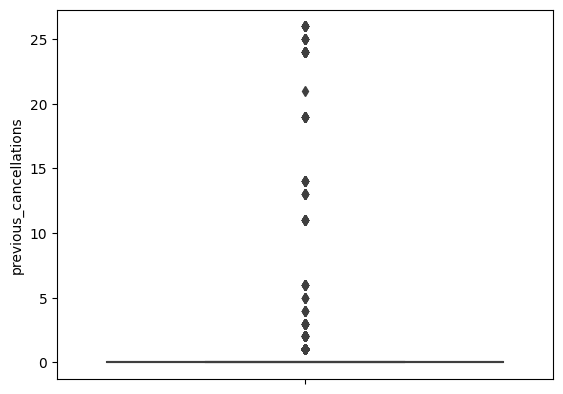

In [465]:
sns.boxplot(y=hotel.previous_cancellations)

In [466]:
hotel.previous_cancellations.agg(['min','max']).reset_index()

,index,previous_cancellations
0,min,0
1,max,26


In [467]:
#z-score
media_previous_cancellations = np.mean(hotel_cpy.previous_cancellations)
std_previous_cancellations = np.std(hotel_cpy.previous_cancellations)
hotel_cpy['z_previous_cancellations'] = (hotel_cpy.previous_cancellations - media_previous_cancellations)/std_previous_cancellations

In [468]:
hotel_cpy[hotel_cpy['z_previous_cancellations']>3].sort_values(by='z_previous_cancellations', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children,z_babies,z_adults,z_previous_cancellations
152,Resort Hotel,275,2015,October,41,4,2,0,2,0,...,0,0,352851e7-02ef-4ef5-8a89-9d0c0e981140,1,2015-10-04,-1.102050,-0.256815,-0.077665,0.226159,26.007947
58340,Resort Hotel,275,2015,October,41,4,2,0,2,0,...,0,0,91f6762b-1f12-4fff-a7fc-19eb9ce303a5,1,2015-10-04,-1.102050,-0.256815,-0.077665,0.226159,26.007947
53765,Resort Hotel,275,2015,October,41,4,2,0,2,0,...,0,0,9c7eb931-e77e-481a-ae1a-fe7b2b597f92,1,2015-10-04,-1.102050,-0.256815,-0.077665,0.226159,26.007947
17308,Resort Hotel,275,2015,October,41,4,2,0,2,0,...,0,0,59df8076-0d2f-4063-915d-0c406548433d,1,2015-10-04,-1.102050,-0.256815,-0.077665,0.226159,26.007947
56839,Resort Hotel,275,2015,October,41,4,2,0,2,0,...,0,0,d473f576-9dfd-48d4-8a09-d4a76d04aba0,1,2015-10-04,-1.102050,-0.256815,-0.077665,0.226159,26.007947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,City Hotel,0,2017,May,21,24,0,1,1,0,...,0,3,b2cde902-569b-4490-b490-fc5a8f8c6939,0,2017-05-24,-2.150825,-0.256815,-0.077665,-1.496469,3.903368
20816,City Hotel,4,2017,January,5,31,0,2,1,0,...,1,0,64068d08-6364-4cfe-8235-67ca665eecbf,0,2017-01-31,-0.745466,-0.256815,-0.077665,-1.496469,3.903368
20263,City Hotel,4,2017,June,22,2,0,1,2,0,...,0,3,1cae4c13-10bb-4aaf-8f36-75347fcc63b6,0,2017-06-02,-2.150825,-0.256815,-0.077665,0.226159,3.903368
53226,City Hotel,13,2017,January,4,25,0,2,1,0,...,0,0,edff4472-9367-417a-a99d-05431264d443,1,2017-01-25,-0.745466,-0.256815,-0.077665,-1.496469,3.903368


In [469]:
hotel_cpy[hotel_cpy['z_previous_cancellations']<3].sort_values(by='z_previous_cancellations', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children,z_babies,z_adults,z_previous_cancellations
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05,0.271846,-0.256815,-0.077665,-1.496469,-0.115646
40594,City Hotel,10,2016,January,3,15,0,1,1,0,...,0,0,aae6befa-81ff-400b-940c-6fbc4660a7d7,1,2016-01-15,-0.621711,-0.256815,-0.077665,-1.496469,-0.115646
40595,City Hotel,267,2016,September,40,30,1,2,2,0,...,0,0,a41a7f05-b451-4326-b8df-248734b6fc4e,1,2016-09-30,-0.158152,-0.256815,-0.077665,0.226159,-0.115646
40596,City Hotel,21,2017,February,8,20,1,2,2,2,...,0,1,9d276552-7ac3-42ff-bdb0-a1e796f5c325,0,2017-02-20,1.834522,4.815543,-0.077665,0.226159,-0.115646
40597,City Hotel,20,2017,May,21,22,1,0,1,0,...,0,3,f7456228-c625-472e-a1e4-3c34b86d6e74,0,2017-05-22,0.785746,-0.256815,-0.077665,-1.496469,-0.115646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8010,City Hotel,20,2017,July,28,11,0,1,1,0,...,0,0,01956792-5410-461f-a1cb-8c6e64fae560,1,2017-07-11,-0.745466,-0.256815,-0.077665,-1.496469,2.898614
24946,City Hotel,202,2016,November,46,6,2,2,1,0,...,0,1,796b6fc9-1bee-4392-bcbb-9586443167f8,0,2016-11-06,-1.311805,-0.256815,-0.077665,-1.496469,2.898614
15179,City Hotel,5,2016,July,30,18,1,1,1,0,...,0,2,183ece79-5f49-436c-bd8f-926af4e28320,0,2016-07-18,-0.787417,-0.256815,-0.077665,-1.496469,2.898614
23465,City Hotel,7,2016,May,22,23,1,2,1,0,...,1,0,10bb2e71-7a5d-4181-9439-80bdd9f59dd6,0,2016-05-23,-0.745466,-0.256815,-0.077665,-1.496469,2.898614


In [470]:
hotel.previous_cancellations.value_counts().sort_index().reset_index()

,index,previous_cancellations
0,0,55780
1,1,4102
2,2,55
3,3,30
4,4,7
5,5,6
6,6,12
7,11,15
8,13,8
9,14,12


In [471]:
hotel[hotel['previous_cancellations'] > 6].shape[0]/hotel.shape[0]

0.002079278739790741

Vemos que si elimino las filas con previous_cancellations > 6, estoy eliminando el 0,002% de las filas. Por lo tanto, voy a eliminar las filas ya que considero que son valores atípicos.

In [472]:
hotel.shape

(60117, 32)

In [473]:
hotel.drop(hotel[hotel['previous_cancellations'] > 6].index, inplace=True)
hotel.shape

(59992, 32)

##### Outliers univariados en ``'days_in_waiting_list'``

<Axes: ylabel='days_in_waiting_list'>

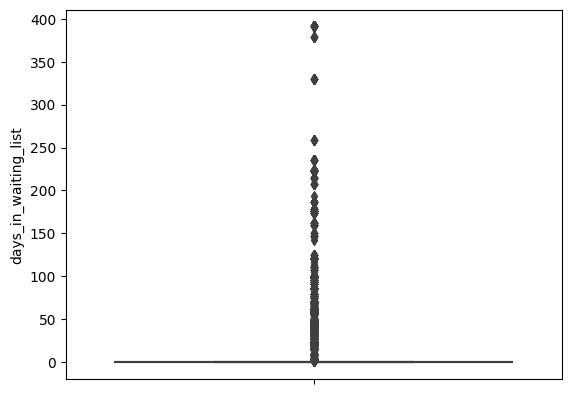

In [474]:
sns.boxplot(y=hotel.days_in_waiting_list)

In [475]:
hotel.days_in_waiting_list.agg(['min','max']).reset_index()

,index,days_in_waiting_list
0,min,0
1,max,391


In [476]:
#z-score
media_days_in_waiting_list = np.mean(hotel_cpy.days_in_waiting_list)
std_days_in_waiting_list = np.std(hotel_cpy.days_in_waiting_list)
hotel_cpy['z_days_in_waiting_list'] = (hotel_cpy.days_in_waiting_list - media_days_in_waiting_list)/std_days_in_waiting_list

In [477]:
hotel_cpy[hotel_cpy['z_days_in_waiting_list']>3].sort_values(by='z_days_in_waiting_list', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children,z_babies,z_adults,z_previous_cancellations,z_days_in_waiting_list
32781,City Hotel,443,2016,October,41,7,0,2,2,0,...,0,b533ba99-73c6-4dc7-a5ef-6051d0b7d750,1,2016-10-07,-0.787417,-0.256815,-0.077665,0.226159,-0.115646,20.838767
53451,City Hotel,457,2016,October,43,21,0,2,2,0,...,0,b6c0c062-2adc-4d8c-8967-eb2d509ba4dd,1,2016-10-21,-0.787417,-0.256815,-0.077665,0.226159,-0.115646,20.838767
58325,City Hotel,457,2016,October,43,21,0,2,2,0,...,0,c6a045b5-5c66-4873-a911-f4e26261419c,1,2016-10-21,-0.787417,-0.256815,-0.077665,0.226159,-0.115646,20.838767
58112,City Hotel,464,2016,October,44,28,0,2,2,0,...,0,8a8fc708-c086-4de2-9d14-f5d19dcdf0e4,1,2016-10-28,-0.787417,-0.256815,-0.077665,0.226159,-0.115646,20.838767
43322,City Hotel,464,2016,October,44,28,0,2,2,0,...,0,25a770b3-f56c-43a7-a47b-c1608ffc9495,1,2016-10-28,-0.787417,-0.256815,-0.077665,0.226159,-0.115646,20.838767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,City Hotel,65,2015,October,40,2,0,1,1,0,...,0,0fa0265b-9971-46de-8627-28e9b4f1d245,0,2015-10-02,-0.053274,-0.256815,-0.077665,-1.496469,-0.115646,3.024024
50479,City Hotel,64,2015,October,40,1,2,4,1,0,...,0,b34bec36-e940-4bef-9265-3225be5f3d97,0,2015-10-01,-0.053274,-0.256815,-0.077665,-1.496469,-0.115646,3.024024
22343,City Hotel,322,2017,June,25,23,2,2,2,0,...,3,0e78747c-2da4-4350-b53e-13eaf6882b78,0,2017-06-23,0.051603,-0.256815,-0.077665,0.226159,-0.115646,3.024024
31928,City Hotel,272,2017,June,26,26,1,1,2,0,...,0,bf607c45-88f3-42cf-951d-d2ec4cf5b8f7,1,2017-06-26,0.261358,-0.256815,-0.077665,0.226159,-0.115646,3.024024


In [478]:
hotel_cpy[hotel_cpy['z_days_in_waiting_list']<3].sort_values(by='z_days_in_waiting_list', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,id,is_canceled,arrival_date,z_adr,z_children,z_babies,z_adults,z_previous_cancellations,z_days_in_waiting_list
46630,City Hotel,72,2015,October,44,28,0,3,2,0,...,1,f35633ff-24d2-4814-ab74-d23ceb4e0567,0,2015-10-28,-0.353853,-0.256815,-0.077665,0.226159,-0.115646,2.970366
55372,City Hotel,72,2015,October,44,28,0,3,2,0,...,0,a7ec3d6f-b35b-40a5-98c6-dc2958a124ac,0,2015-10-28,-0.353853,-0.256815,-0.077665,0.226159,-0.115646,2.970366
5215,City Hotel,92,2015,October,41,7,0,4,2,0,...,0,83f07ba2-4e2f-4ccb-8387-4f714f28cdc9,0,2015-10-07,-0.682540,-0.256815,-0.077665,0.226159,-0.115646,2.970366
34836,City Hotel,72,2015,October,44,28,0,3,2,0,...,0,67c43ab8-496c-4ccb-91d4-15da97b5297a,0,2015-10-28,-0.353853,-0.256815,-0.077665,0.226159,-0.115646,2.970366
28153,City Hotel,69,2015,October,44,25,2,1,2,0,...,0,4af793ff-9fd3-4736-805c-516cd9a8bd09,0,2015-10-25,-0.353853,-0.256815,-0.077665,0.226159,-0.115646,2.970366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20813,Resort Hotel,411,2017,May,22,31,2,4,2,0,...,0,49a5656a-a840-4727-a8a2-cec161365e1e,1,2017-05-31,-0.659467,-0.256815,-0.077665,0.226159,-0.115646,-0.141848
20814,Resort Hotel,211,2016,September,37,7,0,3,1,0,...,0,3eff3502-0d0a-4223-9772-44b482eade76,1,2016-09-07,-0.284005,-0.256815,-0.077665,-1.496469,-0.115646,-0.141848
20815,Resort Hotel,205,2016,August,35,26,2,4,2,0,...,1,49fe23ab-7cd5-4339-96b0-6d97cbc3e593,0,2016-08-26,-0.896490,-0.256815,-0.077665,0.226159,-0.115646,-0.141848
20816,City Hotel,4,2017,January,5,31,0,2,1,0,...,0,64068d08-6364-4cfe-8235-67ca665eecbf,0,2017-01-31,-0.745466,-0.256815,-0.077665,-1.496469,3.903368,-0.141848


In [479]:
hotel.days_in_waiting_list.value_counts().sort_index(ascending=False).reset_index().head(30)

,index,days_in_waiting_list
0,391,33
1,379,5
2,330,7
3,259,5
4,236,16
5,224,9
6,223,33
7,215,12
8,207,8
9,193,1


In [480]:
hotel[hotel['days_in_waiting_list'] == 0].shape[0]/hotel.shape[0]

0.9632284304573944

Vemos que el 93% de los valores de esta variable son 0.

[Text(0.5, 1.0, 'Distribución de la variable "days_in_waiting_list"'),
 Text(0.5, 0, 'Días en lista de espera')]

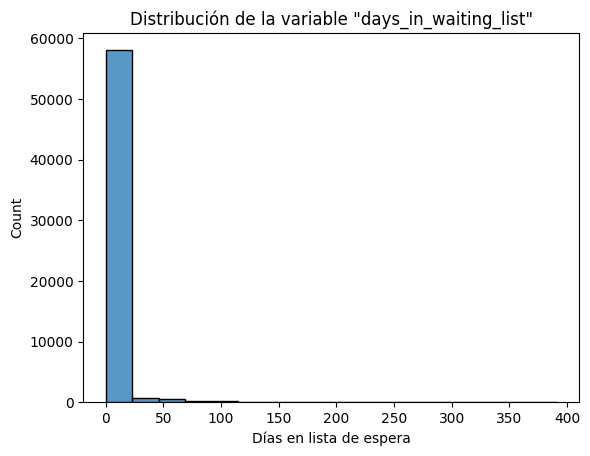

In [481]:
sns.histplot(x=hotel.days_in_waiting_list, data=hotel).set(title='Distribución de la variable "days_in_waiting_list"', xlabel='Días en lista de espera')

In [482]:
hotel[hotel['days_in_waiting_list'] > 200].shape[0]/hotel.shape[0]

0.0021336178157087614

Viendo la distribucion de la variable y teniendo en cuenta todo lo calculado previamente, mi criterio va a ser eliminar las filas que tengan un valor mayor a 200 ya que representa un porcentaje muy bajo 0,002% y los considero valores atípicos.

In [483]:
hotel.shape

(59992, 32)

In [484]:
hotel.drop(hotel[hotel['days_in_waiting_list'] > 200].index, inplace=True)
hotel.shape

(59864, 32)

##### Outliers univariados en ``'lead_time'``

<Axes: ylabel='lead_time'>

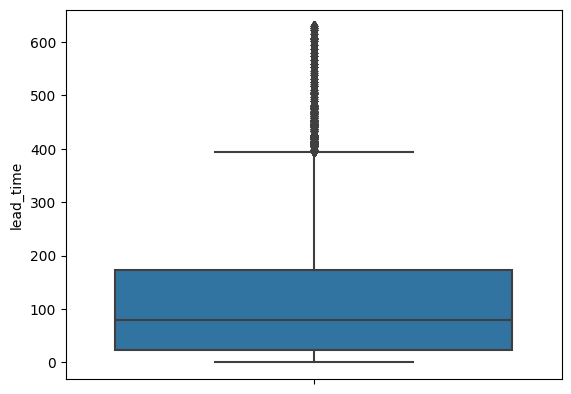

In [485]:
sns.boxplot(y=hotel.lead_time)

In [486]:
hotel.lead_time.agg(['min','max']).reset_index()

,index,lead_time
0,min,0
1,max,629


In [487]:
#Cuartiles
Q1_lead_time=np.quantile(hotel.lead_time,0.25)
Q3_lead_time=np.quantile(hotel.lead_time,0.75)

#Rango intercuartil
IQR_lead_time=Q3_lead_time-Q1_lead_time

#Limite inferior Outliers
out_inf=Q1_lead_time-1.5*IQR_lead_time
out_sup=Q3_lead_time+1.5*IQR_lead_time
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

Valores por debajo de -198.0 son outliers moderados inferiores.
Valores por arriba de 394.0 son outlier moderados superiores.


In [488]:
out_inf=Q1_lead_time-3*IQR_lead_time
out_sup=Q3_lead_time+3*IQR_lead_time
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

Valores por debajo de -420.0 son outliers moderados inferiores.
Valores por arriba de 616.0 son outlier moderados superiores.


In [489]:
outliers = hotel[hotel['lead_time']>615].sort_values(by='lead_time', ascending=False)
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date
43359,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,1c14ee05-ecec-4fce-8e62-118349fd6630,1,2017-03-30
54470,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,61f9647d-6302-4e9e-ae70-42f667b98595,1,2017-03-30
36325,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,885a4ba2-754d-4357-ba2b-89136cdf7b10,1,2017-03-30
38903,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,9126a85f-339e-4e12-b38f-94e1d42b3a12,1,2017-03-30
39760,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,8b37b73b-571e-4026-8eee-8a2964fedc59,1,2017-03-30
15334,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,7340bbcf-9022-40df-b116-677e8044a6ab,1,2017-03-30
13740,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,dd3f017b-b1c2-4931-b958-6dc6640fa352,1,2017-03-30
56524,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,41c25a96-bb83-4cea-99df-7982bbbca79d,1,2017-03-30
9412,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,6dec253c-91e7-423e-9a5b-f53a51763b2e,1,2017-03-30
8984,City Hotel,629,2017,March,13,30,0,2,2,0,...,1.0,Sin compania,0,Transient,62.0,0,0,b0cd1952-9807-4940-9270-0c51248955ff,1,2017-03-30


In [490]:
#z-score
media_lead_time = np.mean(hotel_cpy.lead_time)
std_lead_time = np.std(hotel_cpy.lead_time)
hotel_cpy['z_lead_time'] = (hotel_cpy.lead_time - media_lead_time)/std_lead_time

In [491]:
hotel_cpy[hotel_cpy['z_lead_time']>3].sort_values(by='z_lead_time', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,id,is_canceled,arrival_date,z_adr,z_children,z_babies,z_adults,z_previous_cancellations,z_days_in_waiting_list,z_lead_time
54470,City Hotel,629,2017,March,13,30,0,2,2,0,...,61f9647d-6302-4e9e-ae70-42f667b98595,1,2017-03-30,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,4.665789
13740,City Hotel,629,2017,March,13,30,0,2,2,0,...,dd3f017b-b1c2-4931-b958-6dc6640fa352,1,2017-03-30,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,4.665789
36325,City Hotel,629,2017,March,13,30,0,2,2,0,...,885a4ba2-754d-4357-ba2b-89136cdf7b10,1,2017-03-30,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,4.665789
60381,City Hotel,629,2017,March,13,30,0,2,2,0,...,e0fe52b8-0500-4f5e-8fb2-f0184b750747,1,2017-03-30,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,4.665789
38903,City Hotel,629,2017,March,13,30,0,2,2,0,...,9126a85f-339e-4e12-b38f-94e1d42b3a12,1,2017-03-30,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,4.665789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16554,City Hotel,447,2016,September,40,29,0,2,2,0,...,f3284453-c4c9-48a3-ba40-8123fc03ec96,1,2016-09-29,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,3.022341
38760,City Hotel,447,2016,September,40,29,0,2,2,0,...,e8974df5-3e7f-4a97-869f-4fec59d5913a,1,2016-09-29,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,3.022341
33858,City Hotel,447,2016,September,40,29,0,2,2,0,...,62749c2a-92fe-4605-973d-ac5a26ee662b,1,2016-09-29,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,3.022341
24795,City Hotel,447,2016,September,40,29,0,2,2,0,...,444a1949-7099-4a2b-8233-cec6c166e9d0,1,2016-09-29,-0.850344,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,3.022341


In [492]:
hotel_cpy[hotel_cpy['z_lead_time']<3].sort_values(by='z_lead_time', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,id,is_canceled,arrival_date,z_adr,z_children,z_babies,z_adults,z_previous_cancellations,z_days_in_waiting_list,z_lead_time
51480,Resort Hotel,0,2016,January,5,30,0,1,2,0,...,05f31f87-2878-43aa-a812-34b506d1b8fa,0,2016-01-30,-1.144001,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,-1.014040
24472,City Hotel,0,2017,March,12,22,0,1,2,0,...,c3e227be-a3f7-42be-8754-0f8f643f01dd,1,2017-03-22,-1.899119,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,-1.014040
27391,Resort Hotel,0,2015,November,46,9,1,0,1,0,...,1beb9892-e026-4926-b7b6-607d6d48f40b,0,2015-11-09,-1.416683,-0.256815,-0.077665,-1.496469,-0.115646,-0.141848,-1.014040
17568,Resort Hotel,0,2017,August,34,25,0,1,2,1,...,ab1fd859-45cb-48ba-a40e-9bf59914fa10,0,2017-08-25,1.519889,2.279364,-0.077665,0.226159,-0.115646,-0.141848,-1.014040
48812,City Hotel,0,2017,March,13,29,0,2,2,0,...,2e1e5484-fb61-48d3-aa8e-a4141ad2adba,0,2017-03-29,0.114530,-0.256815,-0.077665,0.226159,-0.115646,-0.141848,-1.014040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26072,City Hotel,444,2016,December,49,1,0,3,1,0,...,077286a8-eff8-42f3-a289-cc74087c1997,1,2016-12-01,-0.577662,-0.256815,-0.077665,-1.496469,0.889107,1.950847,2.995251
40572,City Hotel,444,2016,December,49,1,0,3,1,0,...,4a385bd7-a592-46e4-aef0-07218cbce2b2,1,2016-12-01,-0.577662,-0.256815,-0.077665,-1.496469,0.889107,1.950847,2.995251
25225,City Hotel,444,2016,December,49,1,0,3,1,0,...,4f27f7f4-d892-45ba-94e2-a41721a946c9,1,2016-12-01,-0.577662,-0.256815,-0.077665,-1.496469,0.889107,1.950847,2.995251
397,City Hotel,444,2016,December,49,1,0,3,1,0,...,73be2364-51b6-44a7-9e73-cb0460cec2e0,1,2016-12-01,-0.577662,-0.256815,-0.077665,-1.496469,0.889107,1.950847,2.995251


In [493]:
hotel.lead_time.value_counts().sort_index(ascending=False).reset_index().head(15)

,index,lead_time
0,629,14
1,626,19
2,622,15
3,615,10
4,608,10
5,605,23
6,601,11
7,594,14
8,587,13
9,580,13


In [494]:
hotel[hotel['lead_time'] > 615].shape[0]/hotel.shape[0]

0.0008018174528932247

[Text(0.5, 1.0, 'Distribución de la variable "lead_time"'),
 Text(0.5, 0, 'Lead time')]

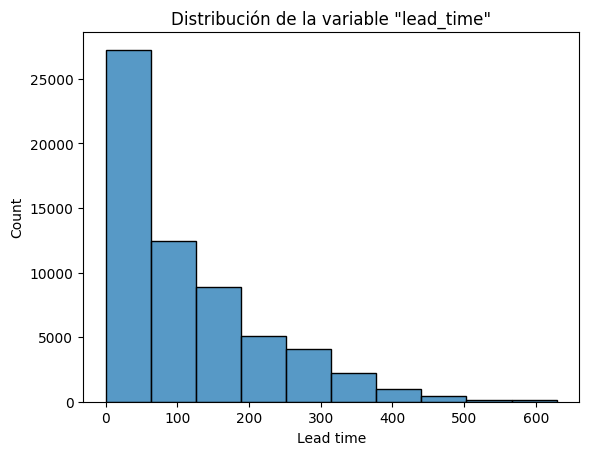

In [495]:
sns.histplot(hotel_cpy.lead_time, bins=10).set(title='Distribución de la variable "lead_time"', xlabel='Lead time')

Teniendo en cuenta lo calculado más arriba, en el análisis del boxplot se detectan outliers severos por encima del valor 615. Viendo también la distribución de la variable y teniendo en cuenta que los valores mayor a 615 representan un porcentaje de 0,007% del total de filas, voy a eliminar las filas que tengan un valor mayor a 615.

In [496]:
hotel.shape

(59864, 32)

In [497]:
hotel.drop(hotel[hotel['lead_time'] > 615].index, inplace=True)
hotel.shape

(59816, 32)

#### Análisis Multivariado

En primer lugar es necesario cuantificar las columnas con datos de tipo ``object`` para poder ser tratados matemáticamente.

In [498]:
hotel_analisis_multivariado = hotel.copy()

hotel_analisis_multivariado['hotel'] = hotel_analisis_multivariado['hotel'].map(
    {'Resort Hotel': 0, 'City Hotel': 1})

hotel_analisis_multivariado['arrival_date_month'] = hotel_analisis_multivariado['arrival_date_month'].map(
    {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

hotel_analisis_multivariado['meal'] = hotel_analisis_multivariado['meal'].map(
    {'Undefined': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'BB': 4})

hotel_analisis_multivariado['market_segment'] = hotel_analisis_multivariado['market_segment'].map(
    {'Undefined': 0, 'Direct': 1, 'Corporate': 2, 'Online TA': 3, 'Offline TA/TO': 4, 'Complementary': 5, 'Groups': 6, 'Aviation': 7})

hotel_analisis_multivariado['distribution_channel'] = hotel_analisis_multivariado['distribution_channel'].map(
    {'Undefined': 0, 'Direct': 1, 'Corporate': 2, 'TA/TO': 3, 'GDS': 4})

hotel_analisis_multivariado['reserved_room_type'] = hotel_analisis_multivariado['reserved_room_type'].map(
    {'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'B': 8, 'C': 9})

hotel_analisis_multivariado['assigned_room_type'] = hotel_analisis_multivariado['assigned_room_type'].map(
    {'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'K': 8, 'B': 9, 'C': 10, 'I': 11})

hotel_analisis_multivariado['deposit_type'] = hotel_analisis_multivariado['deposit_type'].map(
    {'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})

hotel_analisis_multivariado['customer_type'] = hotel_analisis_multivariado['customer_type'].map(
    {'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

hotel_analisis_multivariado.drop(
    columns=['agent', 'company', 'id', 'country', 'arrival_date'], inplace=True)


In [499]:
hotel_analisis_multivariado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59816 entries, 0 to 61912
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           59816 non-null  int64  
 1   lead_time                       59816 non-null  int64  
 2   arrival_date_year               59816 non-null  int64  
 3   arrival_date_month              59816 non-null  int64  
 4   arrival_date_week_number        59816 non-null  int64  
 5   arrival_date_day_of_month       59816 non-null  int64  
 6   stays_in_weekend_nights         59816 non-null  int64  
 7   stays_in_week_nights            59816 non-null  int64  
 8   adults                          59816 non-null  int64  
 9   children                        59816 non-null  int32  
 10  babies                          59816 non-null  int64  
 11  meal                            59816 non-null  int64  
 12  market_segment                  

##### Multivariado - Isolation forest

Configuramos un nuevo dataset.

In [500]:
hotel_isolation_forest = hotel_analisis_multivariado.copy()
X = hotel_isolation_forest.copy().drop(columns=['is_canceled'])
y = hotel_isolation_forest['is_canceled']

hotel_isolation_forest.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,1,49,2016,9,37,5,1,2,1,0,...,2,2,0,0,0,0,115.5,0,1,1
1,0,4,2015,10,44,31,0,1,2,0,...,1,1,0,0,0,0,42.0,1,0,0
2,1,25,2016,10,42,13,0,1,2,2,...,5,5,0,0,0,0,229.0,0,2,0
3,1,26,2016,12,51,12,2,5,2,0,...,1,1,0,1,0,0,75.0,0,0,1
4,1,104,2017,3,12,19,2,5,2,0,...,1,1,0,0,0,2,75.0,0,1,0


In [501]:
hotel_isolation_forest.shape

(59816, 27)

Se crear una nueva instancia del modelo IsolationForest, con los siguientes parámetros:
- ``n_estimators=100``: cantidad de árboles a utilizar.
- ``max_samples='auto'``: cantidad de muestras a utilizar para entrenar cada árbol.
- ``contamination=float``: fracción de outliers que se espera encontrar en los datos.
- ``max_features=1.0``: cantidad de features a utilizar para entrenar cada árbol. 1.0 significa que toma todas las features pasadas al modelo.


In [502]:
iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=1.0,
                          bootstrap=False, n_jobs=-1, random_state=1)


Ajustamos el modelo y devolvemos las predicciones.

In [503]:
pred = iforest.fit_predict(X)

c:\Users\Luca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Obtenemos y vemos los valores considerados outliers:

In [504]:
# Almaceno scores y etiquetas
hotel_isolation_forest['scores'] = iforest.decision_function(X)
hotel_isolation_forest['outlier_label'] = pred

# Observaciones anómalas
hotel_isolation_forest[hotel_isolation_forest.outlier_label == -1]


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores,outlier_label
56,0,289,2015,11,47,20,1,2,2,0,...,0,0,0,2,69.00,0,0,1,-0.003997,-1
83,0,364,2016,10,42,12,0,4,3,0,...,3,0,0,2,101.00,0,0,0,-0.039023,-1
101,0,5,2015,12,50,6,2,0,2,0,...,1,0,0,0,110.00,0,0,1,-0.008447,-1
107,1,72,2015,12,53,27,2,0,2,0,...,0,1,0,0,90.00,0,0,1,-0.001217,-1
111,1,194,2017,5,22,28,2,4,2,2,...,1,0,0,0,227.25,0,0,0,-0.029901,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61845,0,4,2016,12,53,31,0,1,2,2,...,0,0,0,0,169.00,0,1,0,-0.003599,-1
61866,1,13,2015,12,50,6,2,0,2,0,...,0,0,0,1,107.00,0,2,1,-0.010343,-1
61869,0,279,2015,10,41,8,2,5,2,0,...,0,0,0,2,63.40,0,0,1,-0.003003,-1
61886,1,148,2017,7,29,19,0,3,2,1,...,2,0,0,0,118.10,1,2,0,-0.007898,-1


In [505]:
hotel_isolation_forest.outlier_label.value_counts()


 1    56825
-1     2991
Name: outlier_label, dtype: int64

De esta forma se cuentan 2991 outliers.

##### Multivariado - Local Outlier Factor

In [506]:
hotel_lof = hotel_analisis_multivariado.copy()

X = hotel_lof.copy().drop(columns=['is_canceled']).values

hotel_lof.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,1,49,2016,9,37,5,1,2,1,0,...,2,2,0,0,0,0,115.5,0,1,1
1,0,4,2015,10,44,31,0,1,2,0,...,1,1,0,0,0,0,42.0,1,0,0
2,1,25,2016,10,42,13,0,1,2,2,...,5,5,0,0,0,0,229.0,0,2,0
3,1,26,2016,12,51,12,2,5,2,0,...,1,1,0,1,0,0,75.0,0,0,1
4,1,104,2017,3,12,19,2,5,2,0,...,1,1,0,0,0,2,75.0,0,1,0


In [507]:
X.shape

(59816, 26)

Se crea una nueva instancia del modelo LocalOutlierFactor, con el parámetro ``n_neighbors=20``: cantidad de vecinos a utilizar para calcular la distancia.

Ajustamos el modelo y devolvemos las predicciones.

In [508]:
clf = LocalOutlierFactor(n_neighbors=20)

pred = clf.fit_predict(X)

hotel_lof['scores'] = clf.negative_outlier_factor_

Observamos el rango de los 'scores' obtenidos:

In [509]:
hotel_lof.scores.max(), hotel_lof.scores.min()


(-0.8926754421894192, -334514573674.5547)

Considerando el valor altísimo mínimo de los scores, podemos asegurar que hay outliers. Tomando un score de -1,5 como umbral, contamos la cantidad de outliers:

In [510]:
hotel_lof[hotel_lof.scores < -1.5].shape[0]

4024

Se detectan 4024 outliers de esta forma.

In [511]:
outliers_iforest = hotel_isolation_forest[hotel_isolation_forest.outlier_label == -1]
outliers_lof = hotel_lof[hotel_lof.scores < -1.5]


In [512]:
outliers_iforest.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores,outlier_label
56,0,289,2015,11,47,20,1,2,2,0,...,0,0,0,2,69.00,0,0,1,-0.003997,-1
83,0,364,2016,10,42,12,0,4,3,0,...,3,0,0,2,101.00,0,0,0,-0.039023,-1
101,0,5,2015,12,50,6,2,0,2,0,...,1,0,0,0,110.00,0,0,1,-0.008447,-1
107,1,72,2015,12,53,27,2,0,2,0,...,0,1,0,0,90.00,0,0,1,-0.001217,-1
111,1,194,2017,5,22,28,2,4,2,2,...,1,0,0,0,227.25,0,0,0,-0.029901,-1


In [513]:
outliers_lof.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores
8,1,257,2017,6,23,4,2,2,2,0,...,1,0,0,0,0,107.1,0,2,0,-7.064806e+00
13,1,41,2016,9,38,14,0,3,1,0,...,1,2,0,0,2,108.0,0,0,0,-3.426511e+00
41,1,192,2016,5,20,12,0,3,2,0,...,1,0,1,42,0,135.0,0,0,1,-6.714164e+10
83,0,364,2016,10,42,12,0,4,3,0,...,10,3,0,0,2,101.0,0,0,0,-1.058728e+11
89,1,241,2015,10,43,19,1,2,1,0,...,1,1,0,0,0,50.0,0,0,1,-6.940844e+10


##### Tratamiento de outliers multivariados

Quitaremos los outliers detectados por los dos métodos anteriores.

In [514]:
hotel.shape

(59816, 32)

In [515]:
outliers_totales = pd.concat([outliers_iforest, outliers_lof], axis=0)
outliers_totales.shape

(7015, 29)

In [516]:
hotel.drop(outliers_totales.index, inplace=True)
hotel.shape

(53132, 32)

Guardamos este dataset, que es el resultado de toda esta etapa del trabajo.

In [518]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53132 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53132 non-null  object        
 1   lead_time                       53132 non-null  int64         
 2   arrival_date_year               53132 non-null  int64         
 3   arrival_date_month              53132 non-null  object        
 4   arrival_date_week_number        53132 non-null  int64         
 5   arrival_date_day_of_month       53132 non-null  int64         
 6   stays_in_weekend_nights         53132 non-null  int64         
 7   stays_in_week_nights            53132 non-null  int64         
 8   adults                          53132 non-null  int64         
 9   children                        53132 non-null  int32         
 10  babies                          53132 non-null  int64         
 11  me

In [517]:
hotel.to_csv('Datasets/hotels_procesado.csv', index=False)

Esto da por concluida esta etapa del trabajo. Luego de un extenso análisis exploratorio, limpieza del dataset, detección y procesamiento de outliers, se obtuvo un dataset limpio.

A nuestro parecer, las decisiones tomadas a lo largo de este trabajo nos parecen las correctas para poder entrenar un modelo de ML que pueda predecir con bastante precisión la cancelación de una reserva de hotel.